# Load

In [3]:
library(Seurat)
library(Signac)
library(SnapATAC)
library(ArchR)
library(data.table)
library(biomaRt)


Attaching SeuratObject

Loading required package: Matrix

Loading required package: rhdf5

Warning message:
“no DISPLAY variable so Tk is not available”

                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
 

In [25]:
# load the gene activity matrices
out_path <- "/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs"
dataset <- "/PBMC_multiomics/"
# dataset <- "/Chen_2019/"

In [ ]:
# # load RNA data
# df_rna <- read.table("/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/data/PBMC_multiomics/PBMC_multiomics_RNA_annotation.txt", sep="\t", header=TRUE)
# head(df_rna)

In [27]:
rna <- readRDS("/home/siluo/public/SiyuanLuo/projects/sc_chromatin_1_first_results_with_2_datasets/PBMC_multi-omics_10X/rna/pbmc_rna3_with_curated_annotation.rds")
rna

An object of class Seurat 
60201 features across 9379 samples within 2 assays 
Active assay: SCT (23600 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [6]:
# rna <- readRDS("/home/siluo/public/SiyuanLuo/projects/sc_chromatin_1_first_results_with_2_datasets/PBMC_multi-omics_10X/rna/pbmc_rna3_with_curated_annotation.rds")
# rna

An object of class Seurat 
60201 features across 9379 samples within 2 assays 
Active assay: SCT (23600 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [5]:
# max(GetAssayData(object = rna, assay = "SCT", slot = "count")) # raw counts
# max(GetAssayData(object = rna, assay = "SCT", slot = "data")) # normalized
# max(GetAssayData(object = rna, assay = "SCT", slot = "scale.data")) # normalized, scaled, with negative value

[1] 1368

[1] 7.221836

[1] 17.70708

In [28]:
DefaultAssay(rna) <- "RNA"
rna <- FindVariableFeatures(rna, nfeatures = 3000)
rna <- NormalizeData(rna, normalization.method = "LogNormalize")
rna <- ScaleData(rna)

Centering and scaling data matrix



In [29]:
# max(GetAssayData(object = rna, assay = "RNA", slot = "data"))
gene_exp <- GetAssayData(object = rna, assay = "RNA", slot = "data")
# select highly variable genes according to the RNA-seq data
hvg <- VariableFeatures(rna, assay = "RNA")

In [20]:
# gene_exp <- GetAssayData(object = rna, assay = "SCT", slot = "data")

# Select genes

In [30]:
# select highly variable genes according to the RNA-seq data
nfeatures <- 3000
feature_variance <- rna@assays$RNA@meta.features
feature_variance <- feature_variance[order(feature_variance$vst.variance.standardized, decreasing = TRUE)[1:nfeatures],]
head(feature_variance)

vst.mean  vst.variance vst.variance.expected vst.variance.standardized
PTGDS  0.1509756    3.907893  0.2012143             13.864670                
JCHAIN 0.2942744   44.828087  0.4296098             12.041447                
SOX5   0.1335963    1.945575  0.1760411             10.534206                
TCF4   0.6517752   11.812188  1.1808251             10.003334                
IGKC   2.4487685 2481.300505  7.9019376              9.960401                
TXNDC5 0.1364751    4.775145  0.1801855              9.556124                
       vst.variable
PTGDS  TRUE        
JCHAIN TRUE        
SOX5   TRUE        
TCF4   TRUE        
IGKC   TRUE        
TXNDC5 TRUE

In [22]:
# hvg <- VariableFeatures(rna, assay = "SCT")
# nfeatures <- 3000
# feature.attr <- SCTResults(object = rna, slot = "feature.attributes")
# feature_variance <- feature.attr[order(feature.attr$residual_variance, decreasing = TRUE)[1:nfeatures],]

In [26]:
signac <- readRDS(paste0(out_path, dataset, "signac.RDS"))
archr <- readRDS(paste0(out_path, dataset, "archr.RDS"))
snapatac <- readRDS(paste0(out_path, dataset, "snapatac.RDS"))
snapatac2 <- data.frame(fread(paste0(out_path, dataset, "snapatac2.tsv")), row.names=1)

In [6]:
# snapatac2 <- read.table(paste0(out_path, dataset, "snapatac2.tsv"), sep="\t")
## too slow for dataframe with a lot of columns

* Need to select the same set of genes.
* The scales of the score values are different.

In [31]:
dim(gene_exp)
dim(archr)
dim(signac)
dim(snapatac)
dim(snapatac2)

[1] 36601  9379

[1] 24919  8560

[1] 19607  8560

[1]  8560 24961

[1]  8560 56462

In [32]:
snapatac <- t(snapatac)
snapatac2 <- t(snapatac2)

In [33]:
genes <- intersect(intersect(intersect(intersect(hvg, rownames(signac)), rownames(archr)), rownames(snapatac)), rownames(snapatac2))

In [34]:
feature_variance <- feature_variance[genes,]
feature_variance <- feature_variance[order(feature_variance$vst.variance.standardized, decreasing = TRUE)[1:1000],]
genes <- rownames(feature_variance)

In [35]:
colnames(archr)[1:10]
newnames <- sapply(colnames(archr), function(x){strsplit(x, "#", fixed=TRUE)[[1]][2]})
names(newnames) <- NULL
colnames(archr) <- newnames
colnames(archr)[1:10]

[1] "CellinFile1#GGTTGCGGTAAACAAG-1" "CellinFile1#TGTTCCTCATAAGTTC-1"
 [3] "CellinFile1#ACTAGGCGTTAGACCA-1" "CellinFile1#TTAGCAATCGTTCACC-1"
 [5] "CellinFile1#AGTAAGTAGTTAGGCT-1" "CellinFile1#CGAGGTGAGGCATTAC-1"
 [7] "CellinFile1#GACCGAACAGGAACTG-1" "CellinFile1#ACAGCCGGTTGCGGAT-1"
 [9] "CellinFile1#ATGAATGCATTGTCAG-1" "CellinFile1#CTGACCAAGGACAACA-1"

[1] "GGTTGCGGTAAACAAG-1" "TGTTCCTCATAAGTTC-1" "ACTAGGCGTTAGACCA-1"
 [4] "TTAGCAATCGTTCACC-1" "AGTAAGTAGTTAGGCT-1" "CGAGGTGAGGCATTAC-1"
 [7] "GACCGAACAGGAACTG-1" "ACAGCCGGTTGCGGAT-1" "ATGAATGCATTGTCAG-1"
[10] "CTGACCAAGGACAACA-1"

In [36]:
cells <- intersect(intersect(intersect(intersect(colnames(snapatac2), colnames(signac)), colnames(archr)), colnames(snapatac)), colnames(gene_exp))

In [37]:
# make sure each gene activity matrices have the same rows and columns
signac <- signac[genes, cells]
archr <- archr[genes, cells]
snapatac <- snapatac[genes, cells]
snapatac2 <- snapatac2[genes, cells]
gene_exp <- gene_exp[genes, cells]

In [19]:
genes

[1] "PTGDS"      "JCHAIN"     "SOX5"       "TCF4"       "TXNDC5"    
   [6] "MZB1"       "GNLY"       "CDKN1C"     "GPM6A"      "FCGR3A"    
  [11] "CXCL10"     "CUX2"       "CST3"       "ITM2C"      "C1QB"      
  [16] "MS4A1"      "HSP90B1"    "IL1B"       "CCL5"       "EREG"      
  [21] "OSBPL10"    "VCAN"       "NKG7"       "RALGPS2"    "CLNK"      
  [26] "PTPRS"      "TNFRSF17"   "EBF1"       "SEC11C"     "C1QA"      
  [31] "PDZRN4"     "CD74"       "DERL3"      "IFITM3"     "TCF7L2"    
  [36] "FMNL2"      "ZFAT"       "GZMB"       "ERG"        "CD79A"     
  [41] "PLD4"       "COL26A1"    "TP63"       "MKI67"      "HMOX1"     
  [46] "CXCL8"      "COL24A1"    "COL19A1"    "CXCL9"      "ZNF521"    
  [51] "LYZ"        "PAX5"       "PRF1"       "PID1"       "FCRL1"     
  [56] "EDA"        "MEIS1"      "MTSS1"      "SERPINE1"   "SAT1"      
  [61] "SOX4"       "LILRA4"     "STEAP1B"    "CLEC4C"     "MRC1"      
  [66] "LYPD2"      "MS4A7"      "RRM2"       "AIF1"       "SLC38A11"  
  [71] "KLHL14"     "TCL1A"      "GZMH"       "CACNB2"     "S100A9"    
  [76] "THBS1"      "NRP1"       "CHSY3"      "CD36"       "BCL11A"    
  [81] "CD1C"       "IKZF2"      "P2RY14"     "LST1"       "NAMPT"     
  [86] "SPON2"      "ANXA1"      "S100A8"     "PPIB"       "GATA2"     
  [91] "ZNF804A"    "TOP2A"      "FCRL5"      "PLEKHG1"    "SCN9A"     
  [96] "BLK"        "COBLL1"     "SLC35F3"    "LMNA"       "PRSS57"    
 [101] "RTKN2"      "SSPN"       "CYTL1"      "CD34"       "BNC2"      
 [106] "PLEKHD1"    "PLXDC2"     "DENND5B"    "CLEC9A"     "EMP1"      
 [111] "SEL1L3"     "ACSL1"      "CCDC50"     "PAPSS2"     "SASH1"     
 [116] "IRF4"       "ZMAT4"      "GLCCI1"     "FCER1A"     "ADAM23"    
 [121] "TOX"        "FTL"        "ZEB2"       "MAN1A1"     "ASPM"      
 [126] "MED12L"     "TMTC2"      "PBX1"       "ACSM3"      "WDFY4"     
 [131] "PRR16"      "GZMA"       "IRF8"       "CLEC10A"    "FLT3"      
 [136] "IL12RB2"    "CCL3"       "EML6"       "NCAM1"      "FCGR3B"    
 [141] "MSR1"       "PLAUR"      "PDGFD"      "TPRG1"      "PSAP"      
 [146] "FGFBP2"     "CD22"       "SERPINA1"   "P3H2"       "IFNG"      
 [151] "CD79B"      "CFD"        "DACH1"      "RUNX2"      "IFI30"     
 [156] "ADAM12"     "F13A1"      "S100B"      "CLIC3"      "IFIT2"     
 [161] "PROM1"      "DTNA"       "LYN"        "UGCG"       "ZNF462"    
 [166] "SETBP1"     "KLRD1"      "PACSIN1"    "CDH9"       "ANGPT1"    
 [171] "FCER1G"     "NTNG1"      "IGFBP3"     "ALCAM"      "NELL2"     
 [176] "RNF144B"    "ADAM28"     "MYO1E"      "GNG7"       "ST8SIA6"   
 [181] "PRICKLE1"   "DNASE1L3"   "CCL4L2"     "SCT"        "A2M"       
 [186] "BLNK"       "NPR3"       "KLRF1"      "PTGS2"      "KLRB1"     
 [191] "ELL2"       "GZMK"       "RTN1"       "MAFB"       "FCHSD2"    
 [196] "SPIB"       "COCH"       "MYO3B"      "RBM47"      "HIP1"      
 [201] "FMN1"       "LRRK2"      "HES1"       "IFI27"      "SAMD4A"    
 [206] "FCN1"       "PPM1L"      "PRLR"       "VNN1"       "MYO1D"     
 [211] "SPRED1"     "LTB"        "LDB2"       "DYSF"       "TNFRSF21"  
 [216] "CA8"        "JAK2"       "COTL1"      "TMTC1"      "CACNB4"    
 [221] "PTPN13"     "ST18"       "WDR49"      "CHODL"      "NRCAM"     
 [226] "RRP12"      "CST7"       "CD83"       "MARCKS"     "MYCN"      
 [231] "PERP"       "STARD13"    "MEGF9"      "IL2RA"      "AOAH"      
 [236] "TGFBR3"     "ACTB"       "SEZ6L"      "DEPTOR"     "POU2AF1"   
 [241] "SAMD12"     "DIAPH3"     "G0S2"       "ITLN1"      "MSRB3"     
 [246] "ANKRD22"    "CTSS"       "CD38"       "PHEX"       "BCL2"      
 [251] "SIGLEC6"    "DMXL2"      "DOCK4"      "SH3RF1"     "APP"       
 [256] "TK1"        "MAML3"      "CPA3"       "ABTB2"      "HBA1"      
 [261] "BACH2"      "LGALS1"     "IRAK3"      "ZBTB16"     "CSF1R"     
 [266] "KRT5"       "GRIA3"      "ENHO"       "NCALD"      "SMIM24"    
 [271] "TYMP"       "SLC24A4"    "NR6A1"      "IL2RB"      "ATP8B4"    
 [276] "TNFRSF11B"  "VWF"        "KCNQ3"   

# Check scatter plots

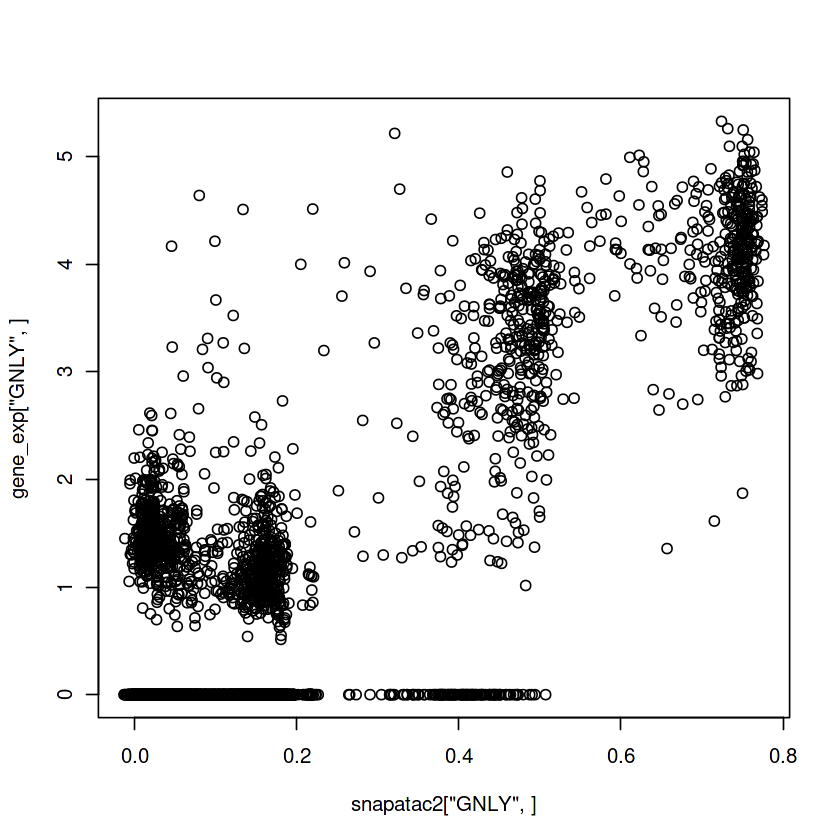

In [42]:
plot(snapatac2['GNLY',], gene_exp['GNLY',])

In [49]:
library(ggExtra)

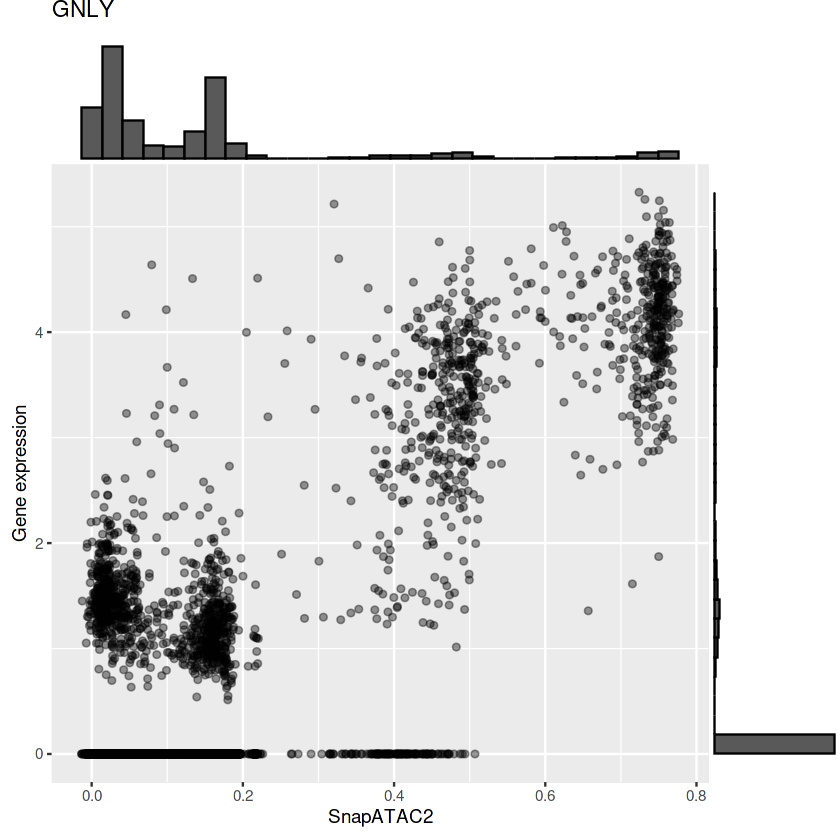

In [56]:
data <- data.frame(
  x = snapatac2['GNLY',], 
  y = gene_exp['GNLY',]
)

# Create scatter plot with density contours
p <- ggplot(data, aes(x = x, y = y)) +
  geom_point(alpha=0.4) +  # Scatter plot
  # geom_density_2d() +  # Density contours
  # theme_bw() +
  labs(title = "GNLY",
       x = "SnapATAC2",
       y = "Gene expression")
p <- ggMarginal(p, type = "histogram", size = 5)
p

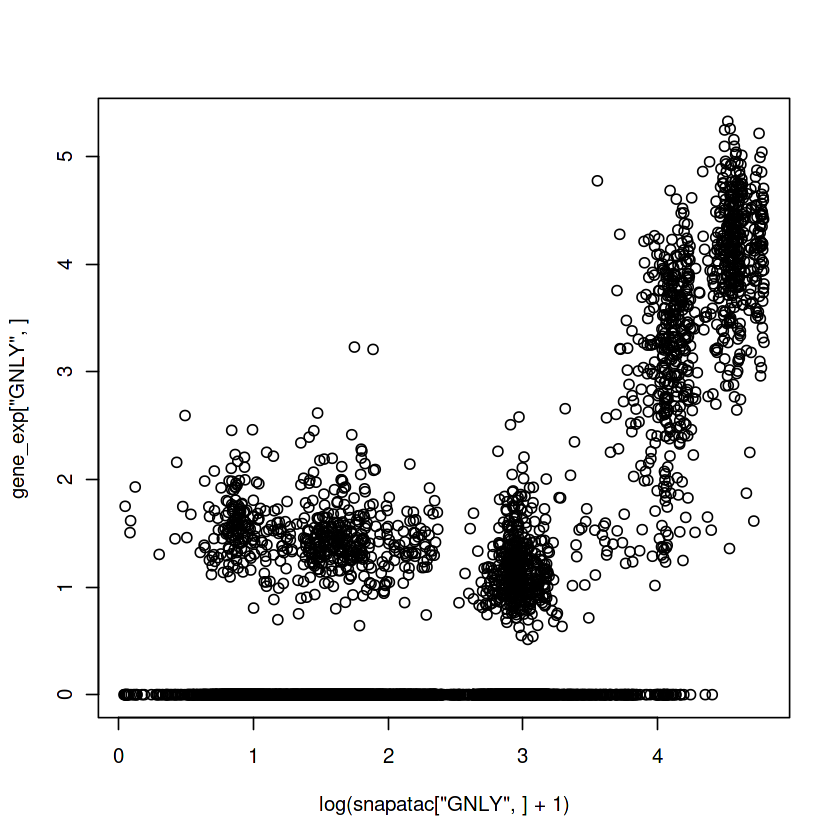

In [32]:
plot(log(snapatac['GNLY',]+1), gene_exp['GNLY',])

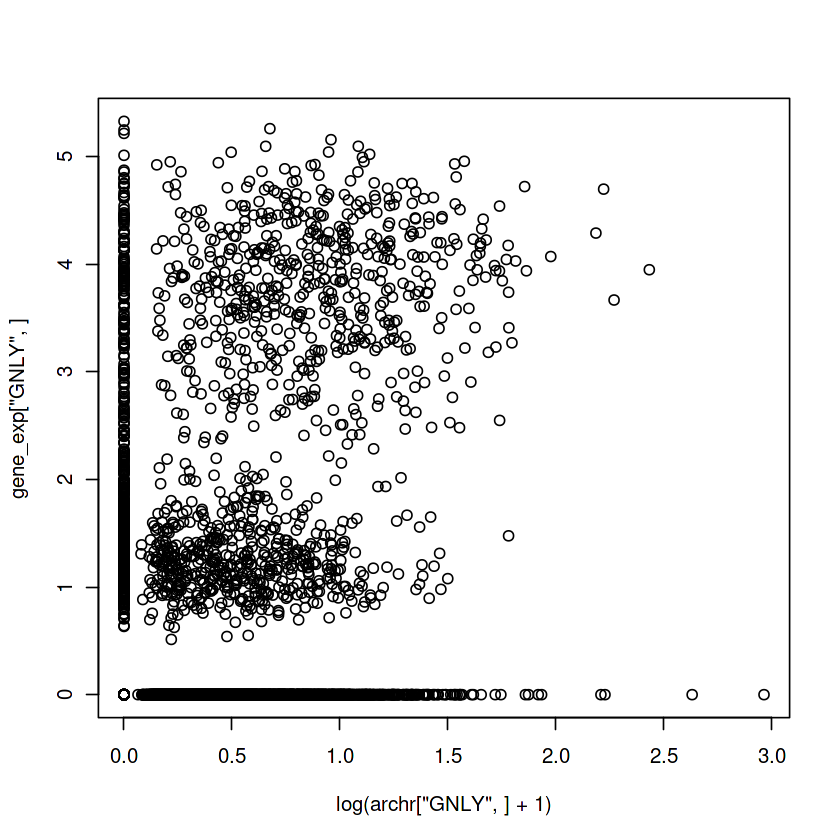

In [34]:
plot(log(archr['GNLY',]+1), gene_exp['GNLY',])

In [58]:
sum(gene_exp['GNLY',] == 0)/length(gene_exp['GNLY',])

[1] 0.7817757

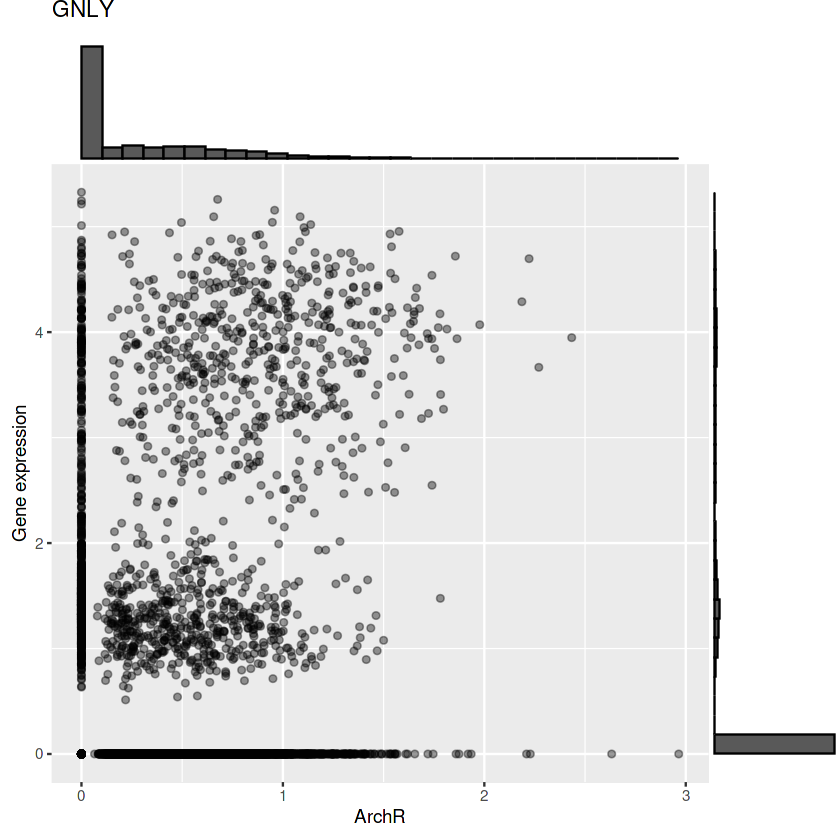

In [57]:
data <- data.frame(
  x = archr['GNLY',], 
  y = gene_exp['GNLY',]
)

# Create scatter plot with density contours
p <- ggplot(data, aes(x = x, y = y)) +
  geom_point(alpha=0.4) +  # Scatter plot
  # geom_density_2d() +  # Density contours
  # theme_bw() +
  labs(title = "GNLY",
       x = "ArchR",
       y = "Gene expression")
p <- ggMarginal(p, type = "histogram", size = 5)
p

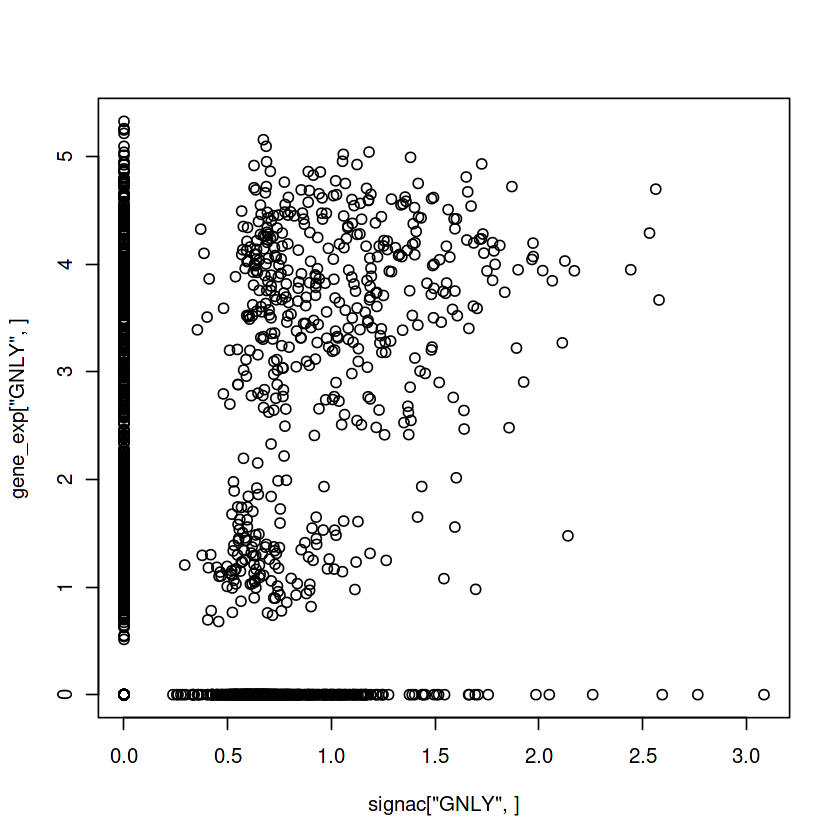

In [20]:
plot(signac['GNLY',], gene_exp['GNLY',])

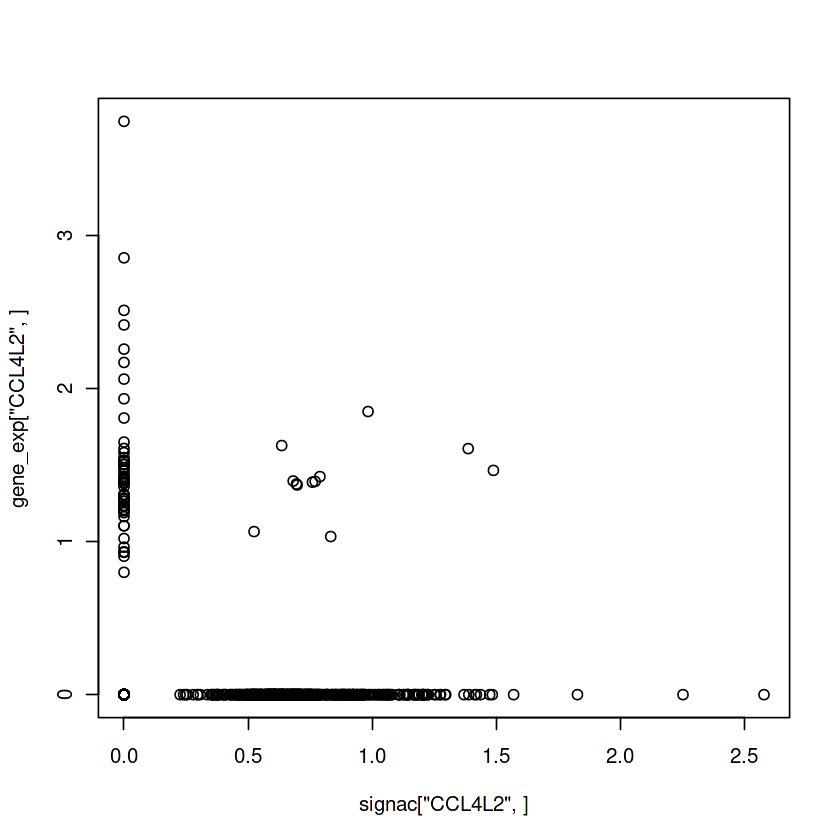

In [24]:
plot(signac['CCL4L2',], gene_exp['CCL4L2',])

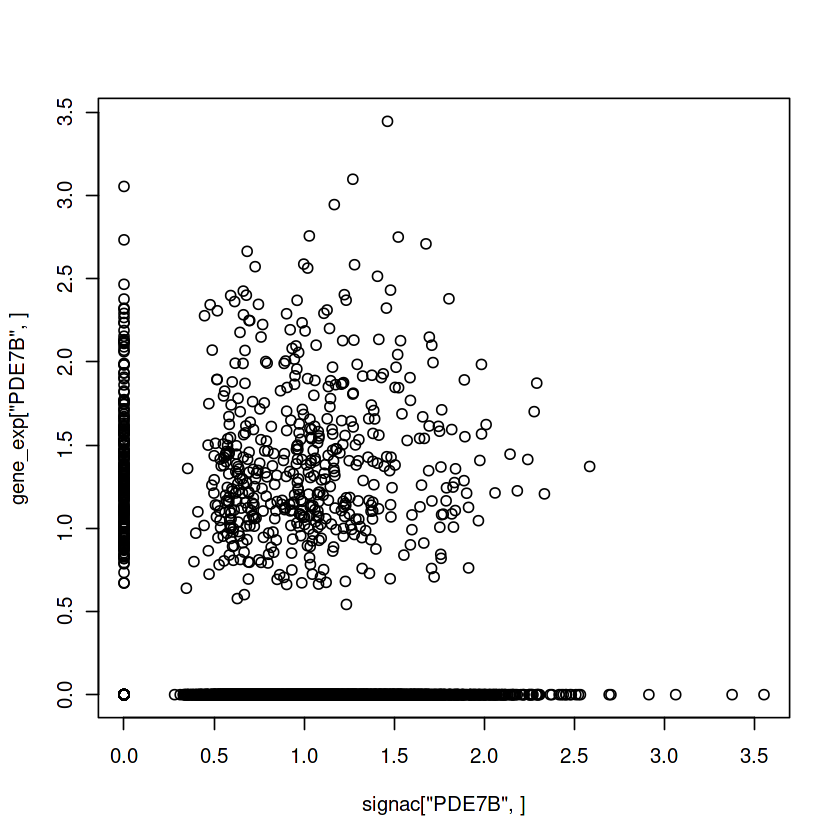

In [23]:
plot(signac['PDE7B',], gene_exp['PDE7B',])

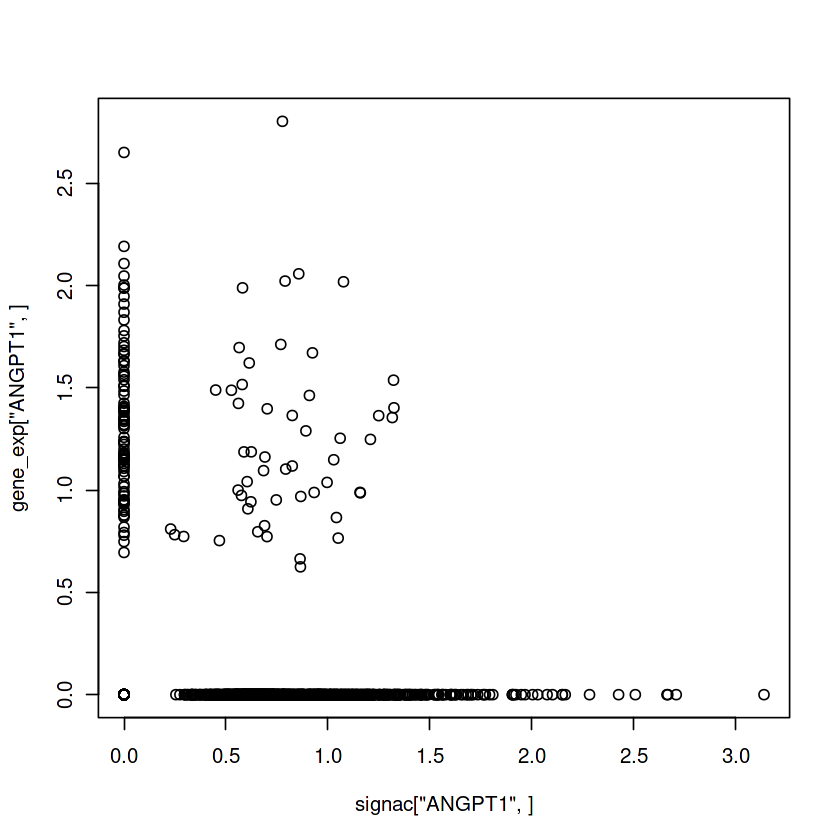

In [25]:
plot(signac['ANGPT1',], gene_exp['ANGPT1',])

In [16]:
m1 <- as.matrix(t(gene_exp))
m2 <- as.matrix(t(archr))

In [19]:
m2[1:10, 1:10]

GNLY  PTGDS TCF4  CCL5  SOX5  NKG7  VCAN  JCHAIN CDKN1C
AAACAGCCAATCCCTT-1 0.000 0.788 0.000 0.295 0.000 1.324 0.000 0      0.000 
AAACAGCCAATGCGCT-1 0.000 2.893 0.000 0.000 0.000 0.000 0.000 0      0.000 
AAACAGCCACCAACCG-1 0.000 5.194 0.000 0.000 0.000 0.000 0.000 0      0.000 
AAACAGCCAGGATAAC-1 0.000 0.000 0.000 1.537 0.000 0.000 0.000 0      0.000 
AAACAGCCAGTTTACG-1 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0      1.173 
AAACAGCCATCCAGGT-1 0.911 0.000 0.000 0.000 0.652 0.000 0.376 0      6.958 
AAACATGCAAGGTCCT-1 0.000 0.697 0.000 0.000 0.000 0.000 0.000 0      1.768 
AAACATGCACCGGCTA-1 1.308 1.609 0.329 1.675 0.321 0.000 0.000 0      0.000 
AAACATGCACTTGTTC-1 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0      0.000 
AAACATGCAGCAAGTG-1 0.000 0.000 0.000 0.000 0.000 1.299 0.000 0      0.000 
                   SAT1 
AAACAGCCAATCCCTT-1 2.157
AAACAGCCAATGCGCT-1 0.000
AAACAGCCACCAACCG-1 0.000
AAACAGCCAGGATAAC-1 0.000
AAACAGCCAGTTTACG-1 0.000
AAACAGCCATCCAGGT-1 2.242
AAACATGCAAGGTCCT-1 1.753
AAACATGCACCGGCTA-1 2.203
AAACATGCACTTGTTC-1 0.000
AAACATGCAGCAAGTG-1 0.647

In [18]:
cor(m1[1:10, 1:10], m2[1:10, 1:10])

Warning message in cor(m1[1:10, 1:10], m2[1:10, 1:10]):
“the standard deviation is zero”


GNLY       PTGDS       TCF4       CCL5       SOX5        NKG7      
GNLY    0.7455028  0.33825532  0.9586644  0.6364053  0.31013702 -0.2127861
PTGDS   0.7999123  0.10044103  1.0000000  0.6957865  0.35814934 -0.1666572
TCF4           NA          NA         NA         NA          NA         NA
CCL5    0.4773622  0.02467547  0.6666667  0.4998913  0.15177719  0.3809353
SOX5           NA          NA         NA         NA          NA         NA
NKG7    0.4142093  0.05470234  0.6543081  0.3619490  0.06447775  0.4978147
VCAN           NA          NA         NA         NA          NA         NA
JCHAIN -0.1634293  0.36315498 -0.1111111 -0.1842576 -0.15577975 -0.1666572
CDKN1C  0.5075219 -0.22876984 -0.1111111 -0.1842576  0.88808868 -0.1666572
SAT1    0.2995696 -0.11284500 -0.2506075 -0.4155871  0.68819941 -0.3758899
       VCAN       JCHAIN CDKN1C     SAT1       
GNLY   -0.1418654 NA     -0.2028932  0.34559592
PTGDS  -0.1111111 NA     -0.1589089  0.43600457
TCF4           NA NA             NA          NA
CCL5   -0.1666667 NA     -0.2383634  0.64246083
SOX5           NA NA             NA          NA
NKG7   -0.2535052 NA     -0.3625581  0.35011670
VCAN           NA NA             NA          NA
JCHAIN -0.1111111 NA     -0.1589089 -0.30126751
CDKN1C  1.0000000 NA      0.9580609  0.44905659
SAT1    0.8559129 NA      0.8266557  0.06772496

# Correlate gene expression to gene scores

In [25]:
m1 <- as.matrix(gene_exp)[1:30,1:30]
m2 <- as.matrix(signac)[1:30,1:30]
colnames(m2) <- paste0("m2", colnames(m2))

In [ ]:
cal_cor <- function(matrix1, matrix2, method){
    # Ensure the matrices have the same dimensions
    if (all(dim(matrix1) == dim(matrix2))) {
    
    # Initialize a vector to store the correlations
    correlations <- numeric(ncol(matrix1))
    
    # Loop through the columns
    for (i in seq_len(ncol(matrix1))) {
        correlations[i] <- cor(matrix1[, i], matrix2[, i], method)
    }
    
    # Print the correlations
    return(correlations)

    } else {
    stop("Matrices do not have the same dimensions.")
    }
}

In [ ]:
df_cor_cells <- data.frame(method=c(), value=c(), cor=c())
method_names <- c("Signac", "ArchR", "SnapATAC", "SnapATAC2")
gene_score_ls <- c("signac", "archr", "snapatac", "snapatac2")

for(i in 1:4){
    for(cors in c("pearson", "spearman")){
        value <- cal_cor(as.matrix(gene_exp), as.matrix(get(gene_score_ls[i])), method = cors)
        df_cor_cells <- rbind(df_cor_cells, data.frame(method=rep(method_names[i], length(value)), value=value, cor=rep(cors, length(value))))
        saveRDS(df_cor_cells, file = paste0(output_path, "/cells_cor_df_", method_names[i], "_", cors, ".RDS"))
    }
}

df_cor_genes <- data.frame(method=c(), value=c(), cor=c())
for(i in 1:4){
    for(cors in c("pearson", "spearman")){
        value <- cal_cor(as.matrix(t(gene_exp)), as.matrix(t(get(gene_score_ls[i]))), method = cors)
        df_cor_genes <- rbind(df_cor_genes, data.frame(method=rep(method_names[i], length(value)), value=value, cor=rep(cors, length(value))))
        saveRDS(df_cor_genes, file = paste0(output_path, "/genes_cor_df_", method_names[i], "_", cors, ".RDS"))
    }
}

# Calculate gene scores by meta cells

In [39]:
library(DelayedArray)

In [9]:
out_path <- "/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs"
dataset <- "/PBMC_multiomics/"

# dataset <- "/Chen_2019/"

In [18]:
metacell_ls <- readRDS(paste0(out_path, dataset, "metacells.RDS"))
gene_score_ls <- readRDS(paste0(out_path, dataset, "all_gene_scores.RDS"))

In [37]:
gene_score_names <- c("signac", "archr", "snapatac", "snapatac2", "gene_exp")
mname <- gene_score_names[1]
x <- gene_score_ls[[mname]]
k <- metacell_ls$idx
cells <- intersect(colnames(x), metacell_ls$cells)
x <- x[, cells]
k <- k[cells]

In [38]:
dim(x)
length(k)

[1] 1000 8560

[1] 8560

# Analysis

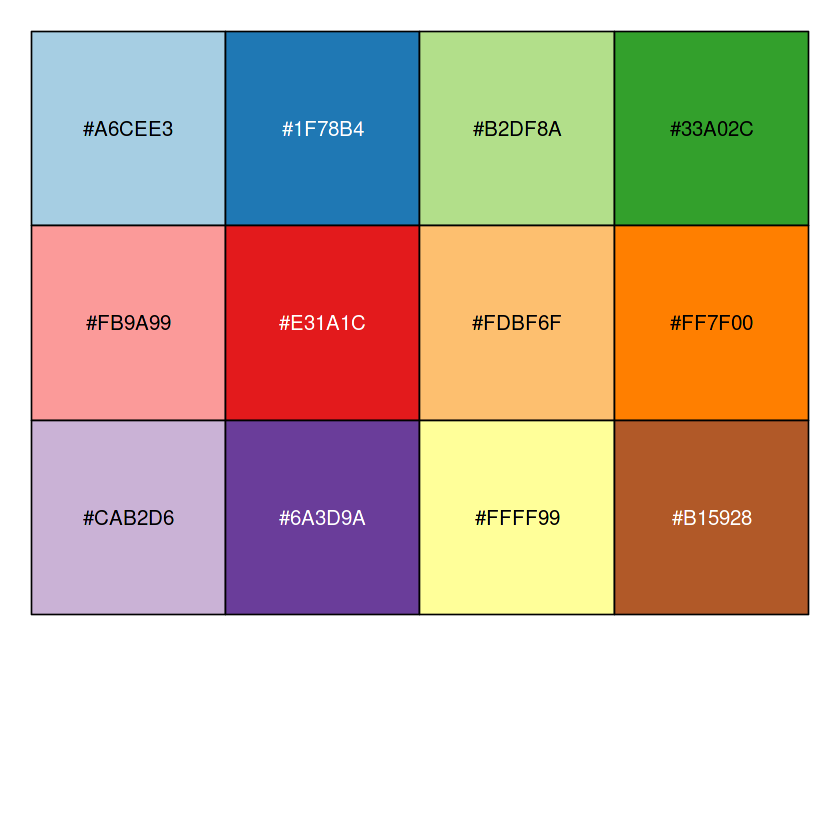

In [4]:
source("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/visual_utils.R")
show_col(my_col_m)
library(stringr)

In [1]:
df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/PBMC_multiomics/cells_cor_df_pearson.RDS")

In [2]:
dim(df)
head(df)

[1] 34240     3

method value     cor    
1 Signac 0.3123058 pearson
2 Signac 0.2264939 pearson
3 Signac 0.2598773 pearson
4 Signac 0.2013200 pearson
5 Signac 0.2277085 pearson
6 Signac 0.3241197 pearson

In [28]:
unique(df$method)

[1] "Signac"    "ArchR"     "SnapATAC"  "SnapATAC2"

In [17]:
my_col_m

[1] "#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C" "#FB9A99" "#E31A1C" "#FDBF6F"
 [8] "#FF7F00" "#CAB2D6" "#6A3D9A" "#FFFF99" "#B15928"

## Pearson correlation

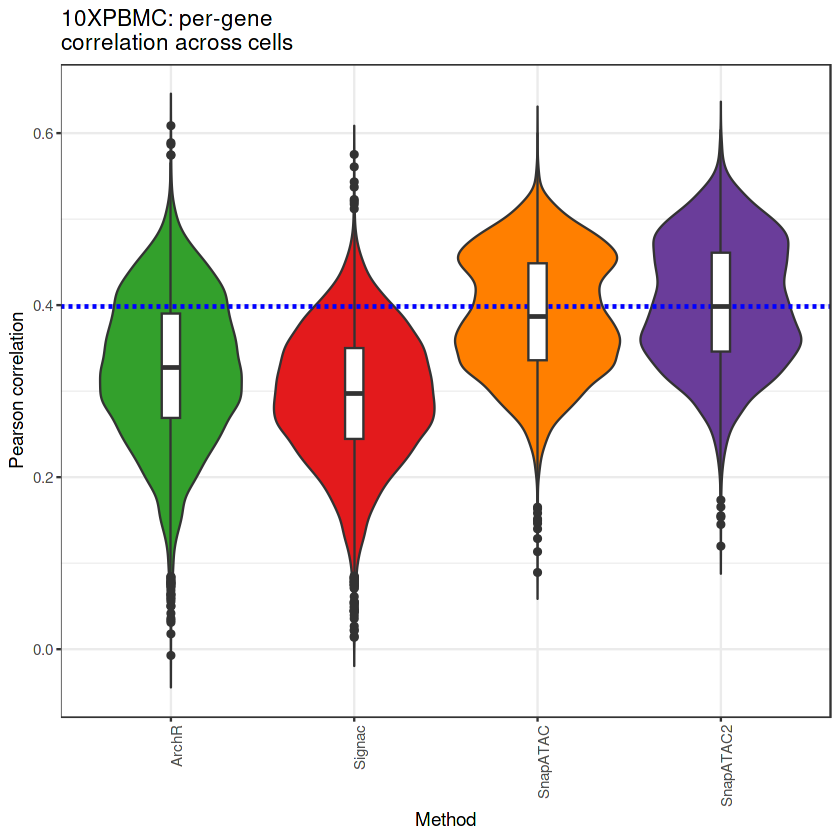

In [5]:
df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/PBMC_multiomics/cells_cor_df_pearson.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value)) %>% summarize(max=max(median))
max_median <- max_median$max

p1 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Method", y="Pearson correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none") + 
  ggtitle(str_wrap("10XPBMC: per-gene correlation across cells", width = 25))
p1


Warning message:
“Removed 12 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”


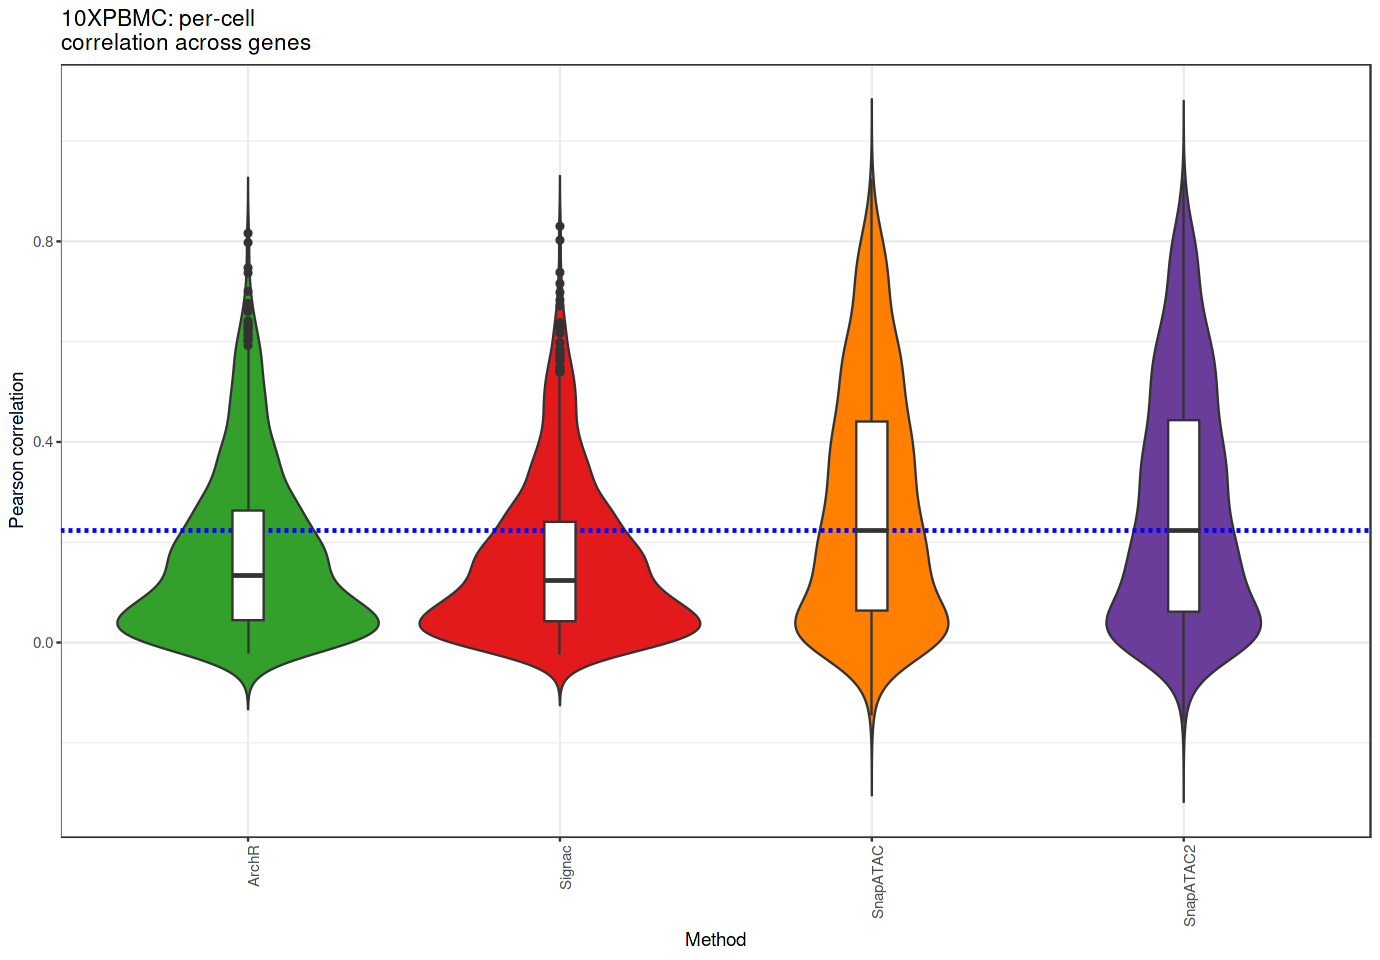

In [146]:
df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/PBMC_multiomics/genes_cor_df_pearson.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p2 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Method", y="Pearson correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none") + 
  ggtitle(str_wrap("10XPBMC: per-cell correlation across genes", width = 25))

p2


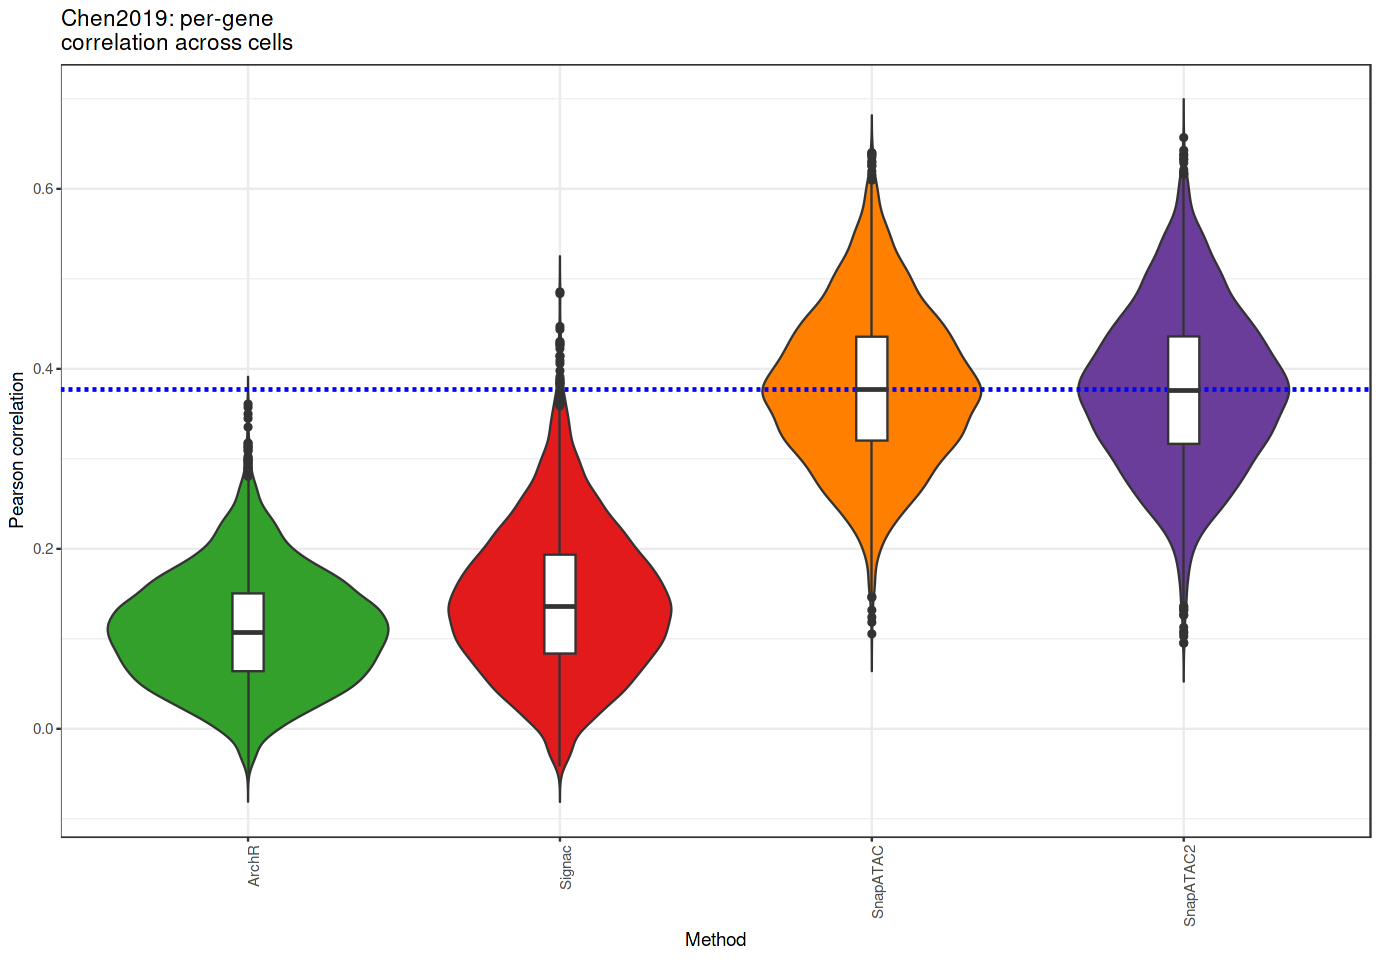

In [145]:
df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/Chen_2019/cells_cor_df_pearson.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p3 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Method", y="Pearson correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none") + 
  ggtitle(str_wrap("Chen2019: per-gene correlation across cells", width = 25))
p3

Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


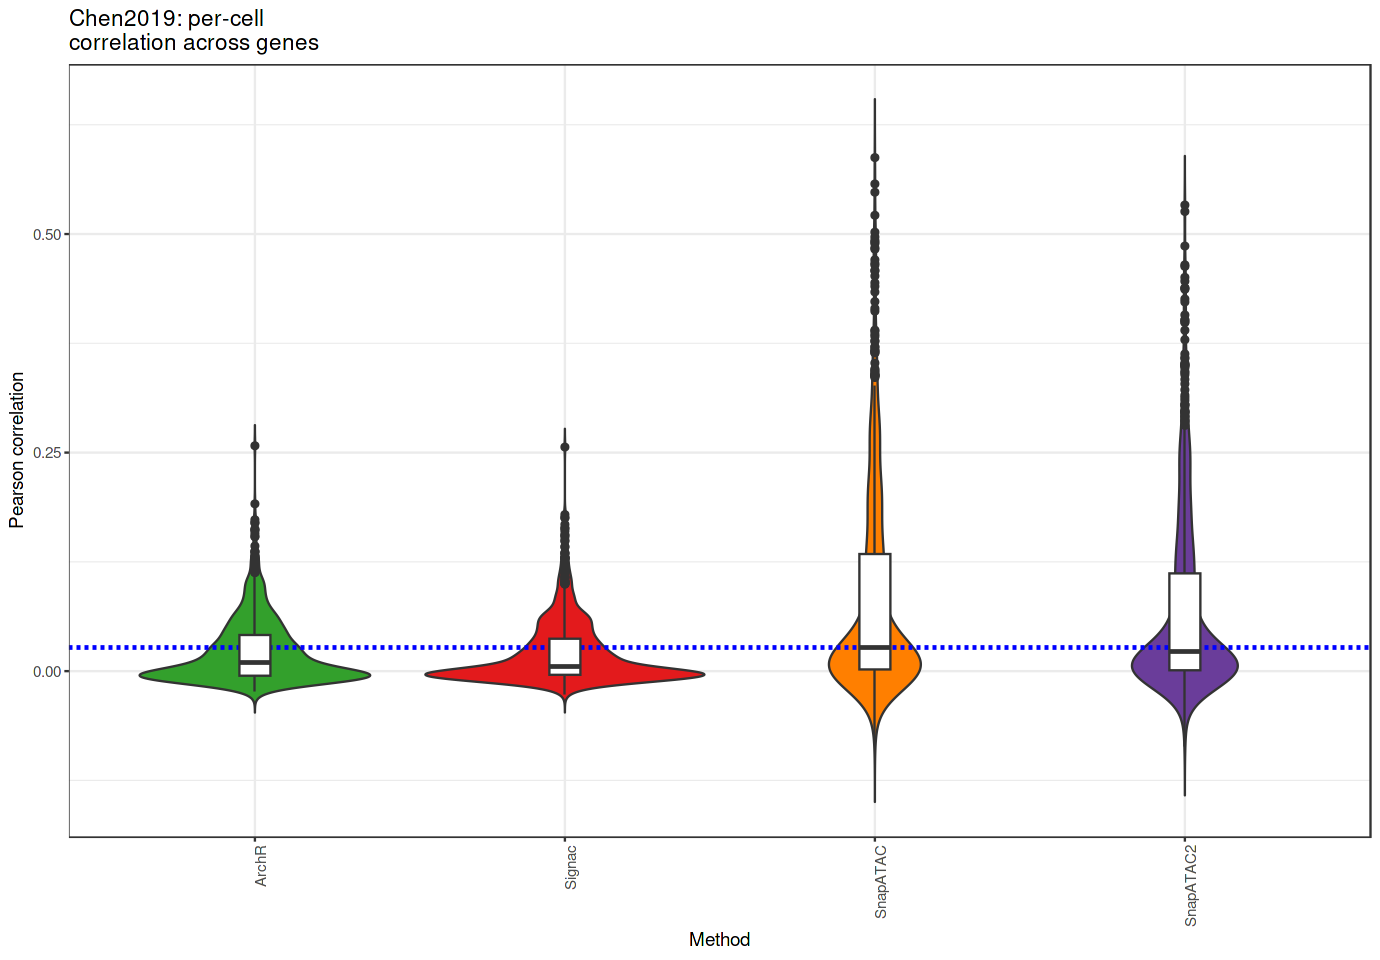

In [144]:
df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/Chen_2019/genes_cor_df_pearson.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p4 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Method", y="Pearson correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none") + 
  ggtitle(str_wrap("Chen2019: per-cell correlation across genes", width = 25))
p4

In [95]:
pdf("../outputs/PBMC_cells_pearson.pdf", width=2.5, height=5)
plot(p1)
dev.off() 
pdf("../outputs/PBMC_genes_pearson.pdf", width=2.5, height=5)
plot(p2)
dev.off() 
pdf("../outputs/Chen2019_cells_pearson.pdf", width=2.5, height=5)
plot(p3)
dev.off() 
pdf("../outputs/Chen2019_genes_pearson.pdf", width=2.5, height=5)
plot(p4)
dev.off() 

png 
  2

Warning message:
“Removed 12 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”


png 
  2

png 
  2

Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


png 
  2

Warning message:
“Removed 12 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


png 
  2

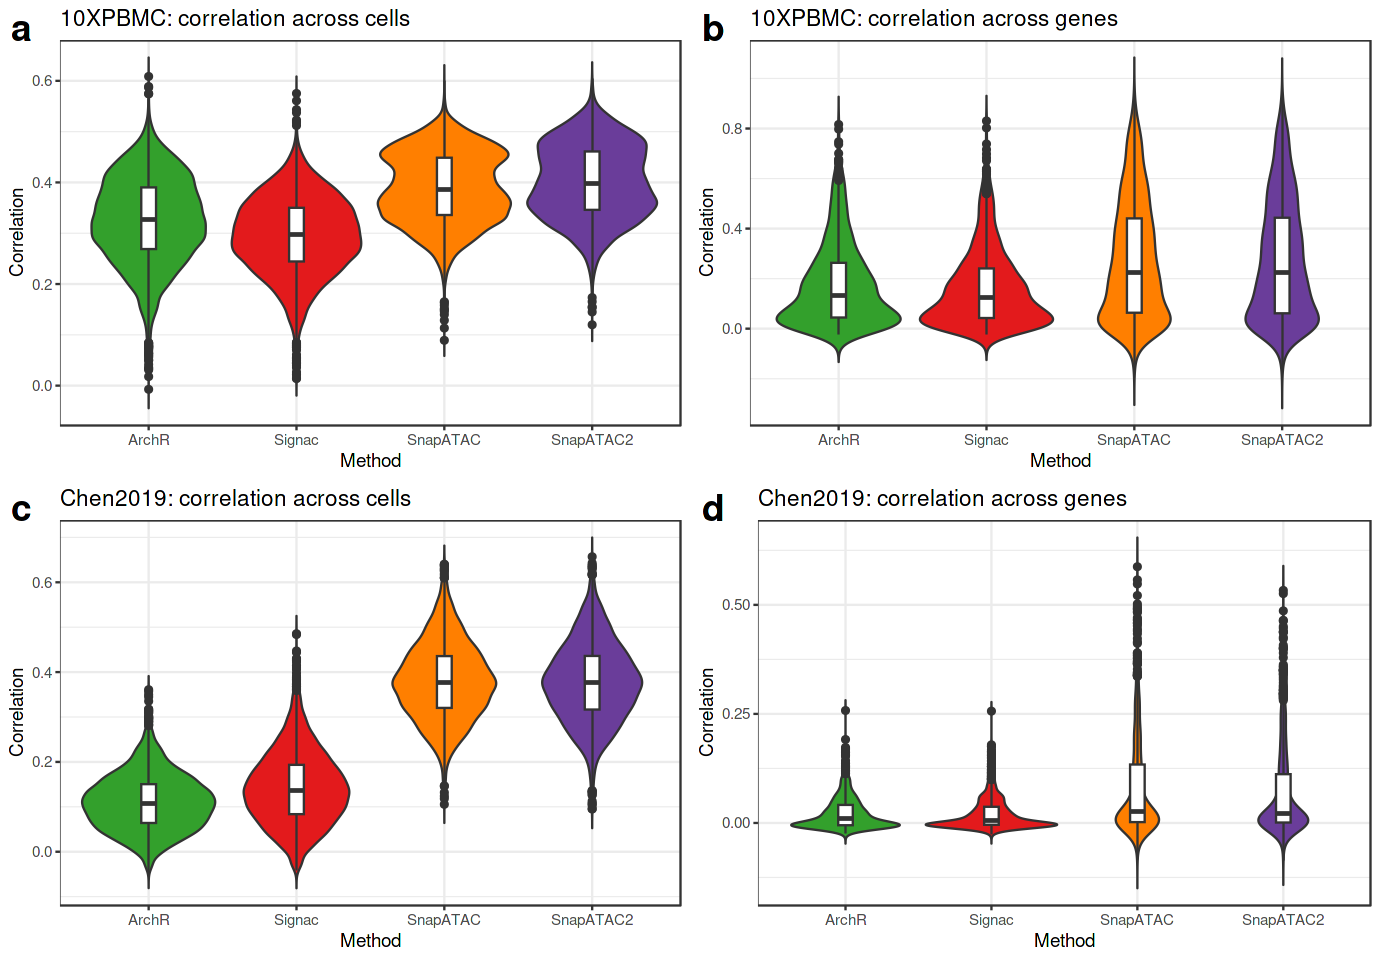

In [52]:
library(ggpubr)
options(repr.plot.width=11.5, repr.plot.height=8)
p5 <- ggarrange(p1, p2, p3, p4,
          labels = c("a", "b", "c", "d"),font.label=list(color="black",size=22, face="bold"),
          ncol = 2, nrow = 2)
p5

pdf("../outputs/all_pearson.pdf", width=10, height=10)
plot(p5)
dev.off() 

## metacells, pearson correlation

Warning message:
“Removed 12 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”


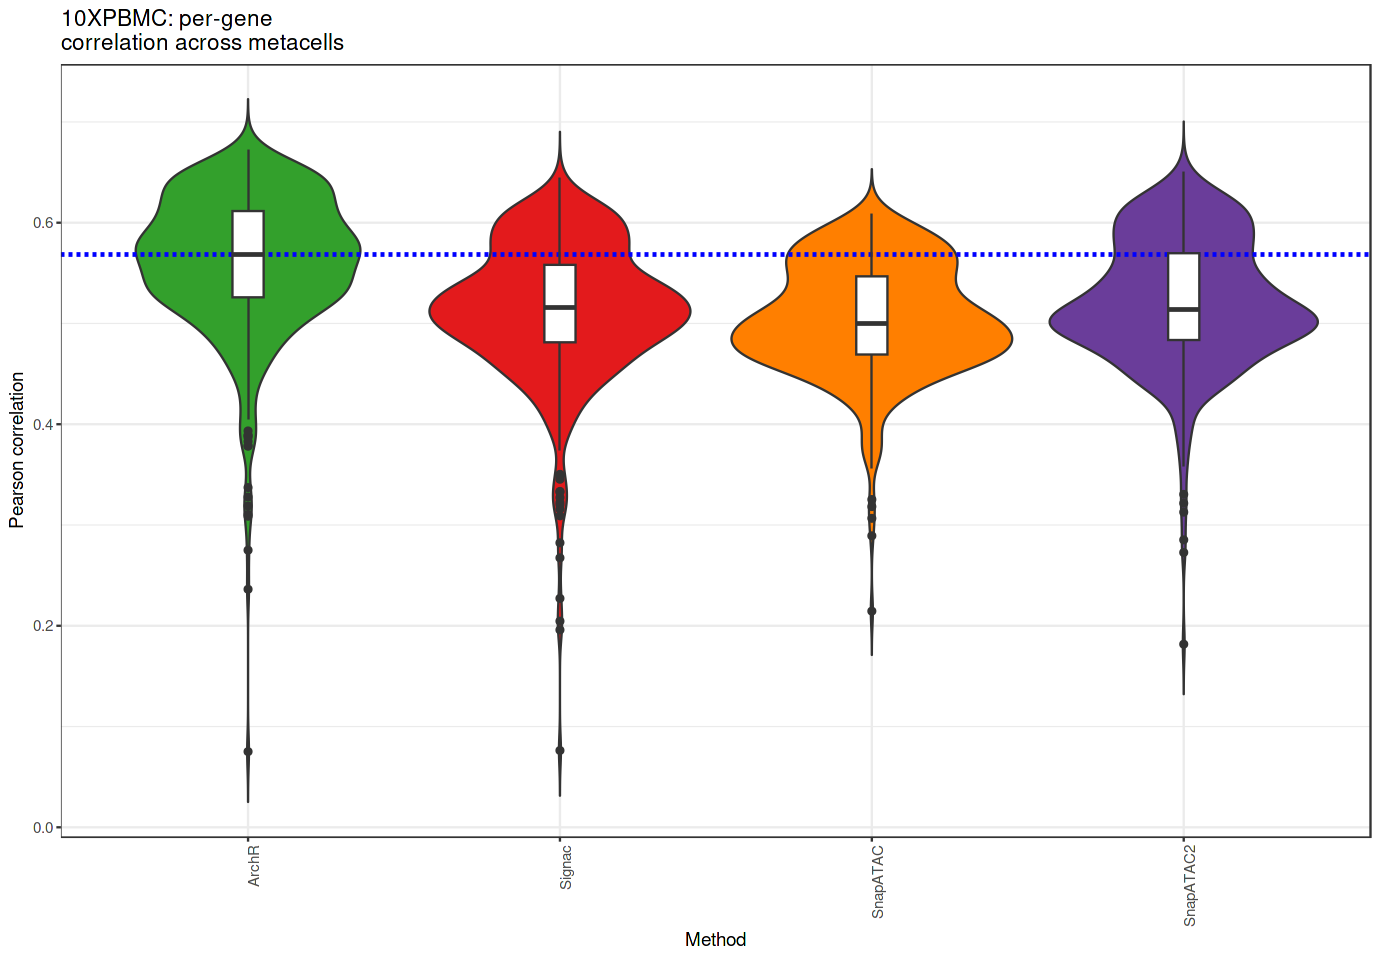

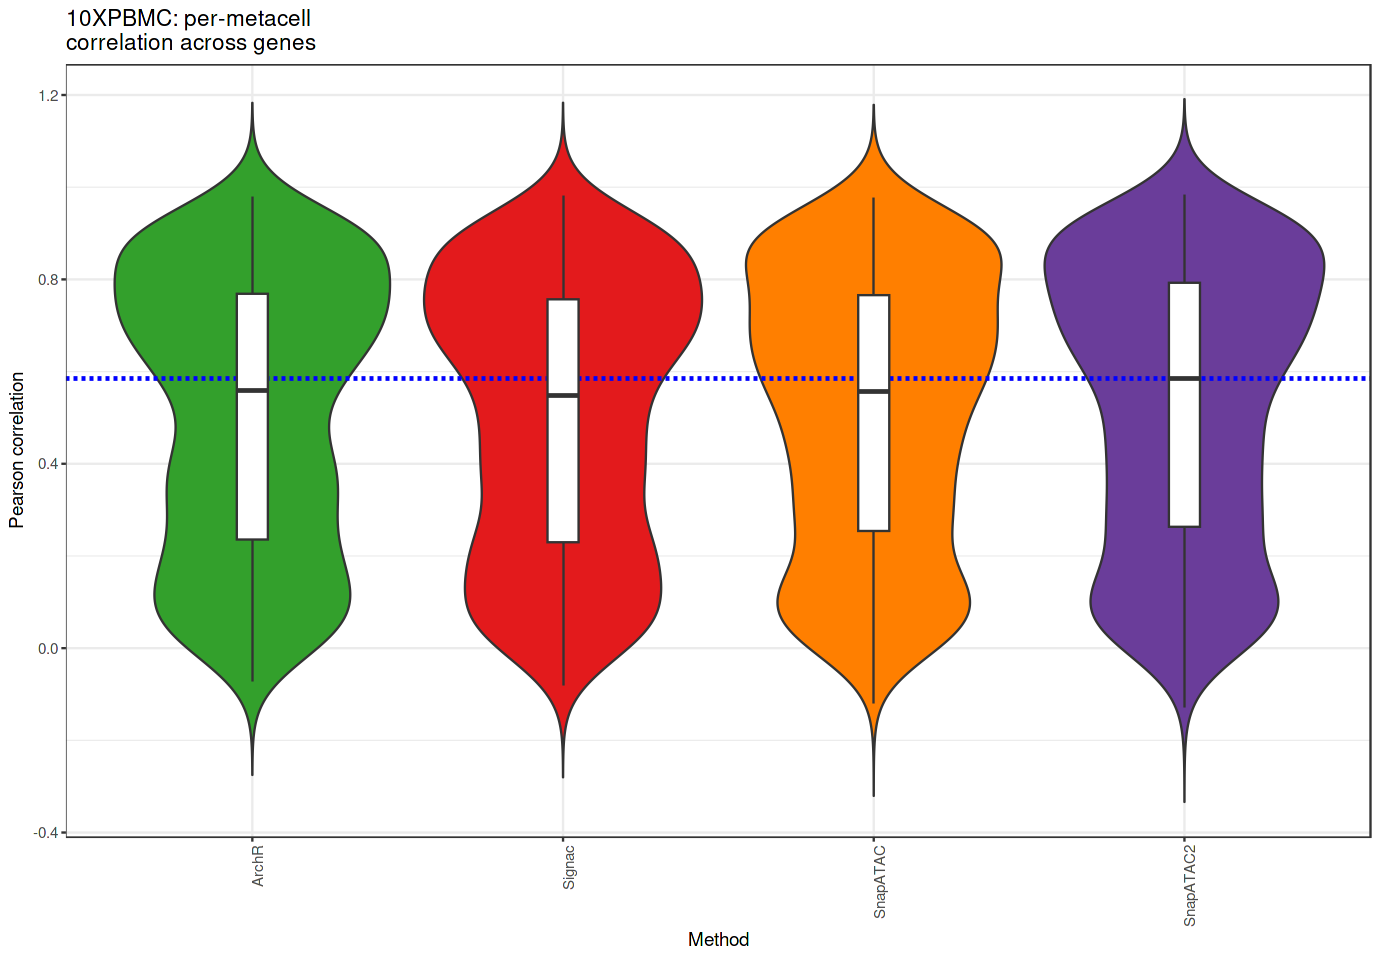

Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


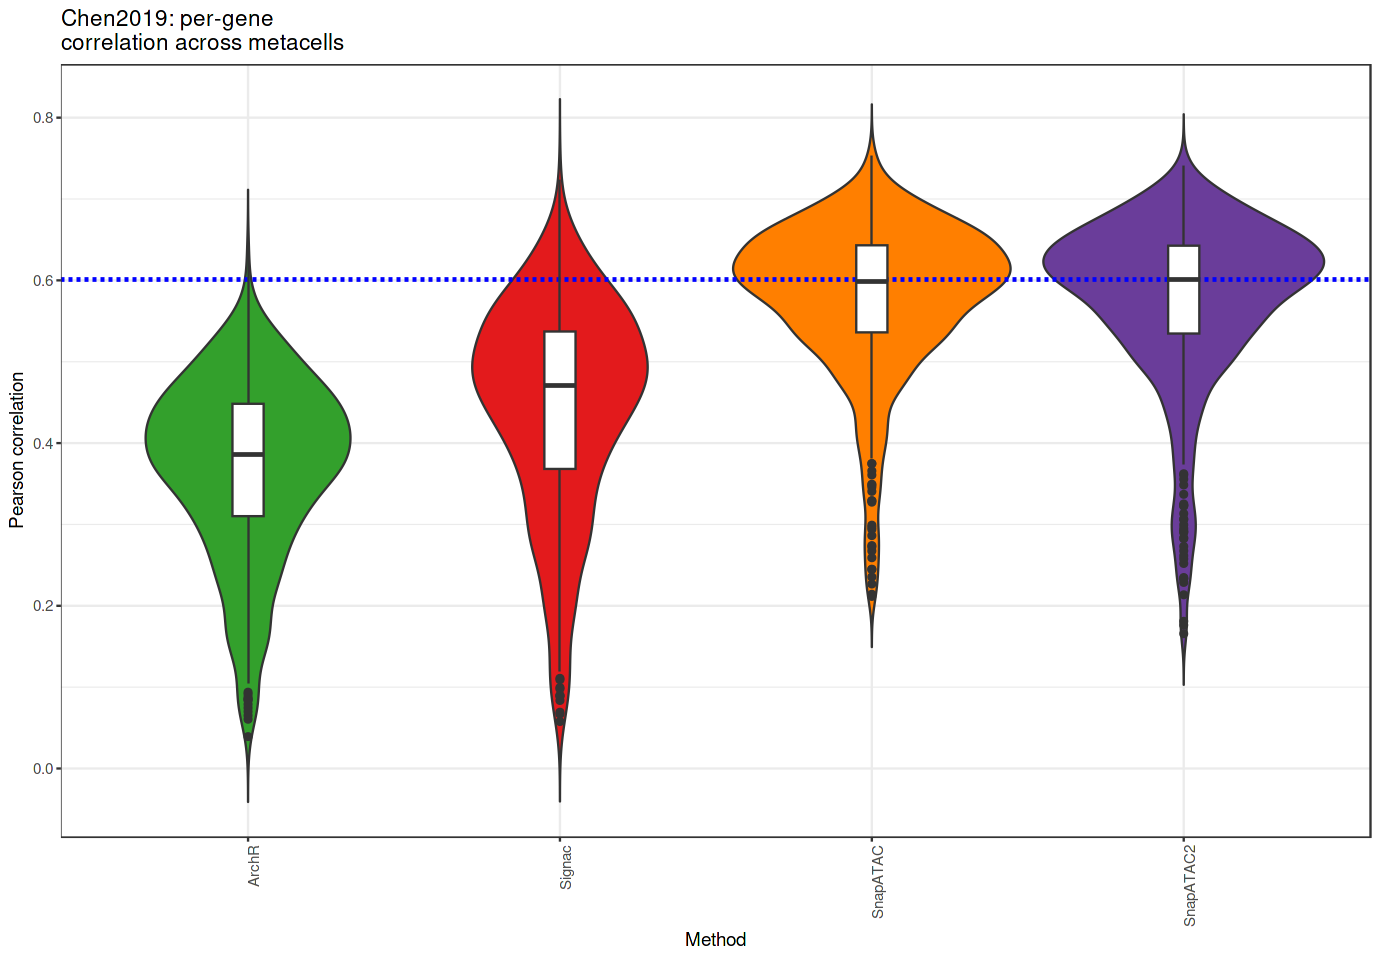

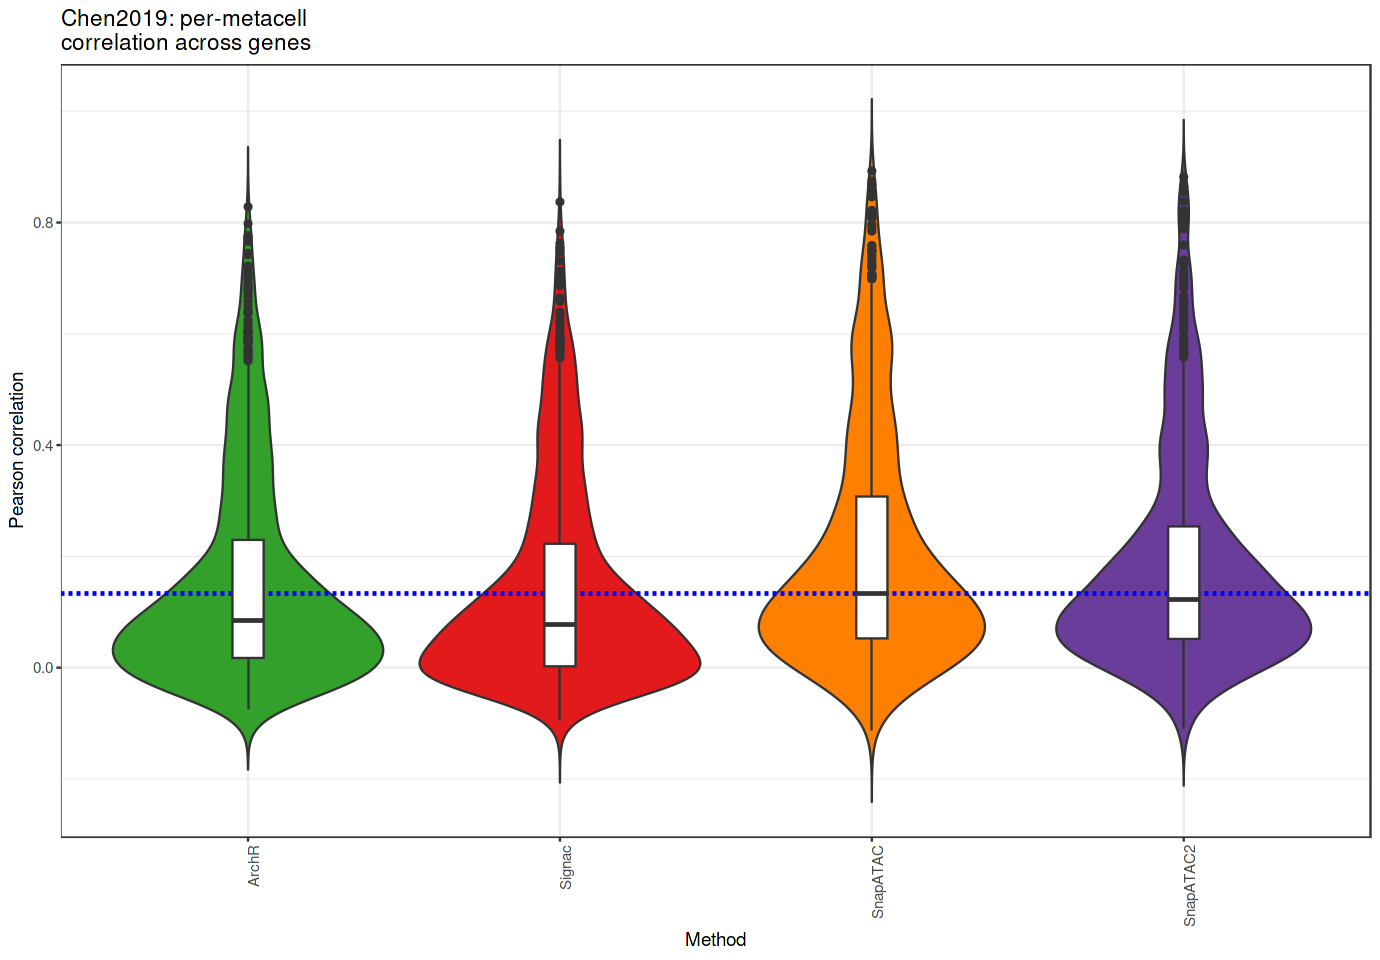

In [ ]:
df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/PBMC_multiomics/metacells/cells_cor_df_pearson.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p11 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Method", y="Pearson correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none") + 
  ggtitle(str_wrap("10XPBMC: per-gene correlation across metacells", width = 28))

p11

df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/PBMC_multiomics/metacells/genes_cor_df_pearson.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p12 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Method", y="Pearson correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none") + 
  ggtitle(str_wrap("10XPBMC: per-metacell correlation across genes", width = 25))

p12

df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/Chen_2019/metacells/cells_cor_df_pearson.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p13 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Method", y="Pearson correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none") + 
  ggtitle(str_wrap("Chen2019: per-gene correlation across metacells", width = 28))
p13

df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/Chen_2019/metacells/genes_cor_df_pearson.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p14 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Method", y="Pearson correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none") + 
  ggtitle(str_wrap("Chen2019: per-metacell correlation across genes", width = 25))
p14

Warning message:
“Removed 12 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


png 
  2

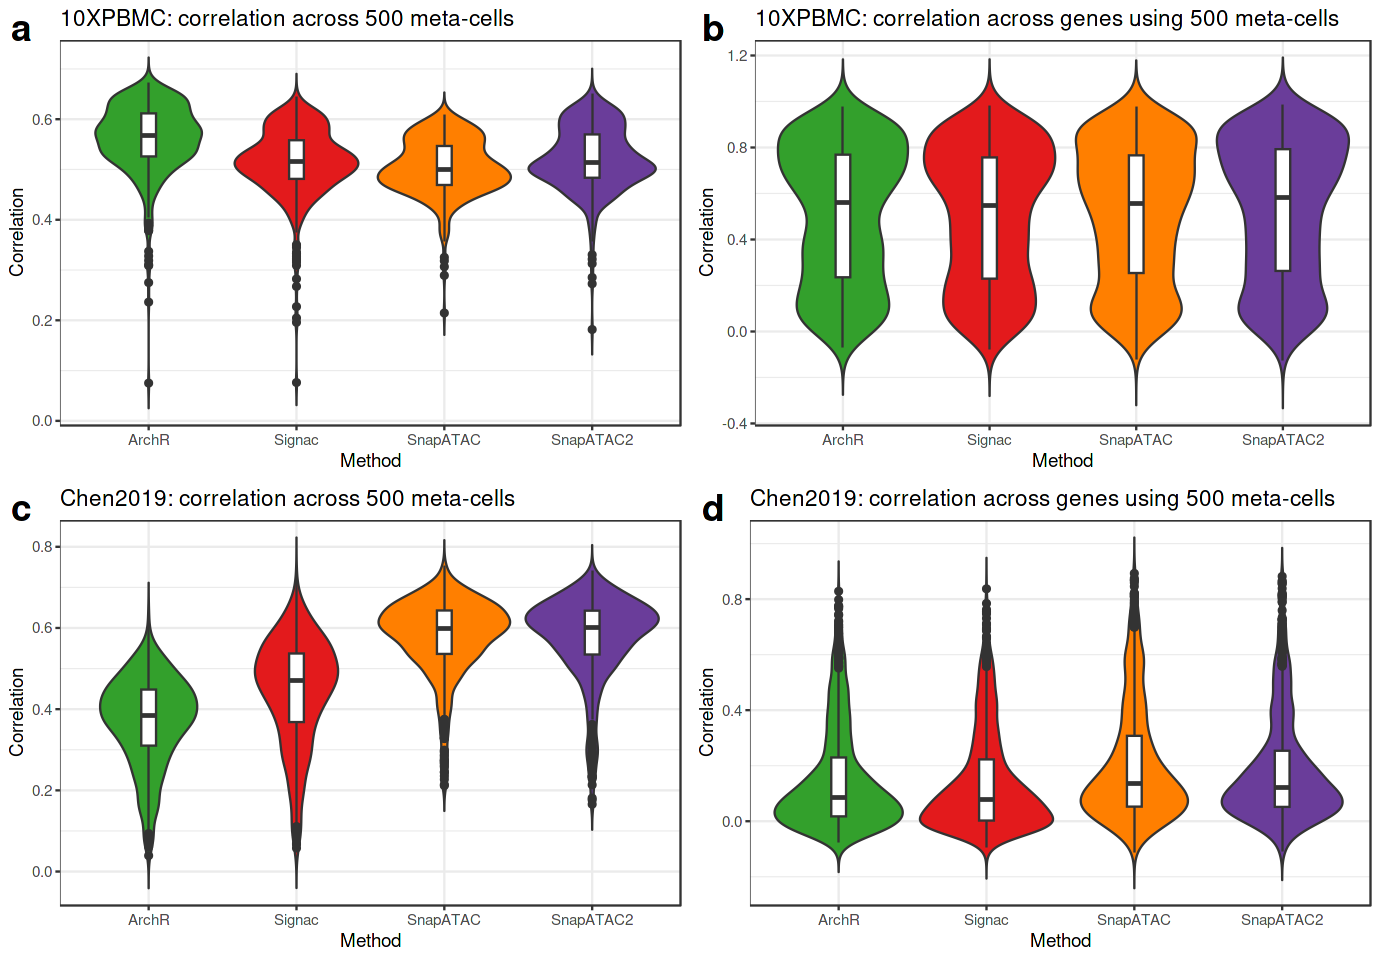

In [ ]:
options(repr.plot.width=11.5, repr.plot.height=8)
p7 <- ggarrange(p1, p2, p3, p4,
          labels = c("a", "b", "c", "d"),font.label=list(color="black",size=22, face="bold"),
          ncol = 2, nrow = 2)
p7

pdf("../outputs/metacells_all_pearson.pdf", width=10, height=10)
plot(p7)
dev.off() 

Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


png 
  2

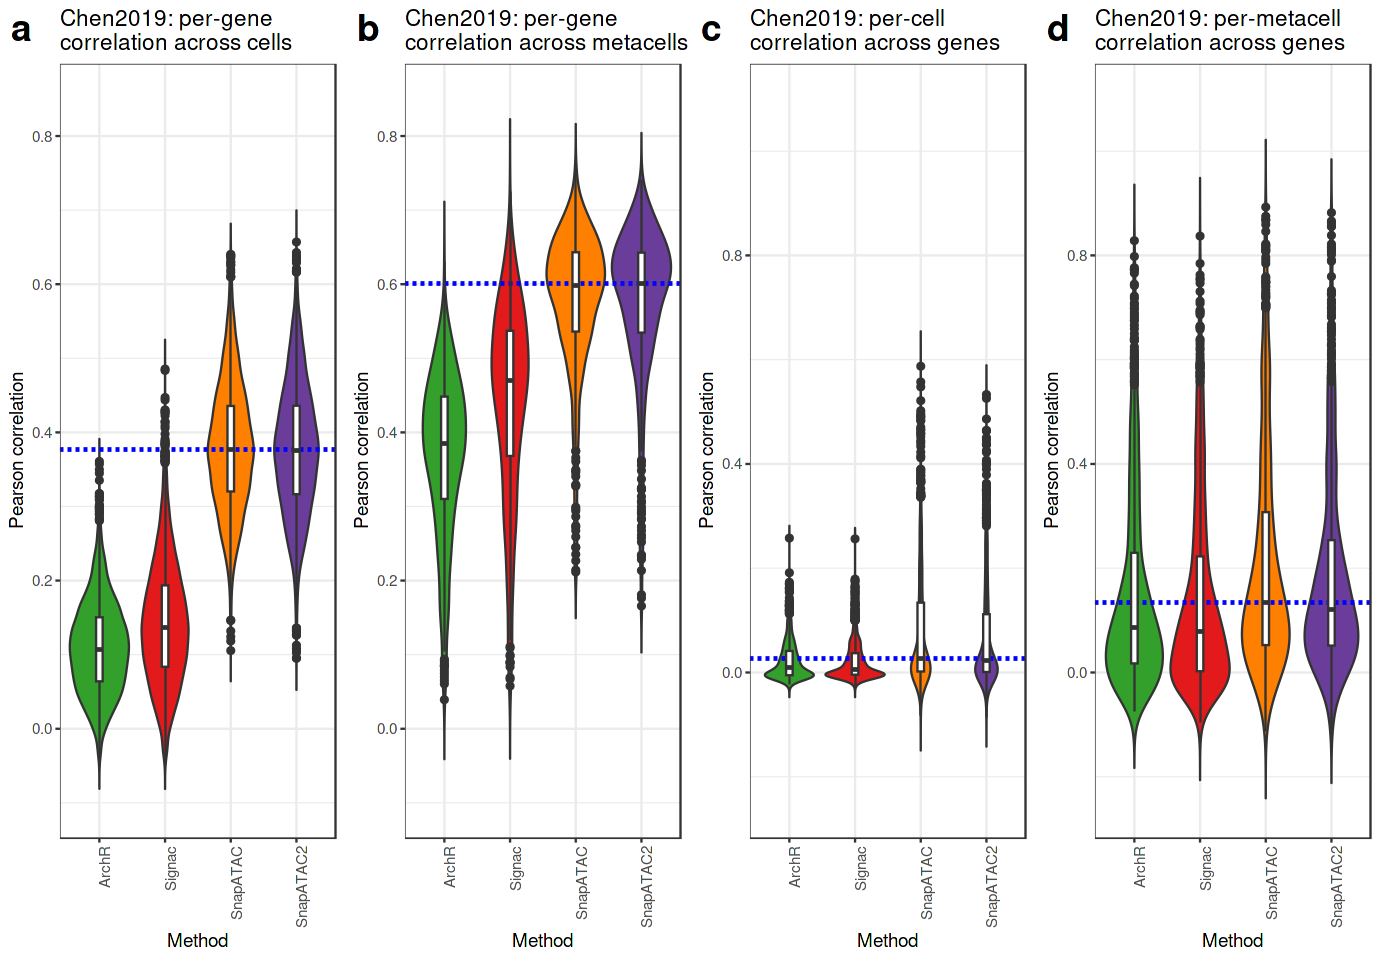

In [ ]:
options(repr.plot.width=11.5, repr.plot.height=8)
p_chen <- ggarrange(p3+ylim(-0.1,0.85), p13+ylim(-0.1, 0.85), p4+ylim(-0.25,1.1), p14+ylim(-0.25,1.1),
          labels = c("a", "b", "c", "d"),font.label=list(color="black",size=22, face="bold"),
          ncol = 4, nrow = 1)
p_chen

pdf("../outputs/Chen2019_all_pearson.pdf", width=11, height=5)
plot(p_chen)
dev.off() 

Warning message:
“Removed 12 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”


png 
  2

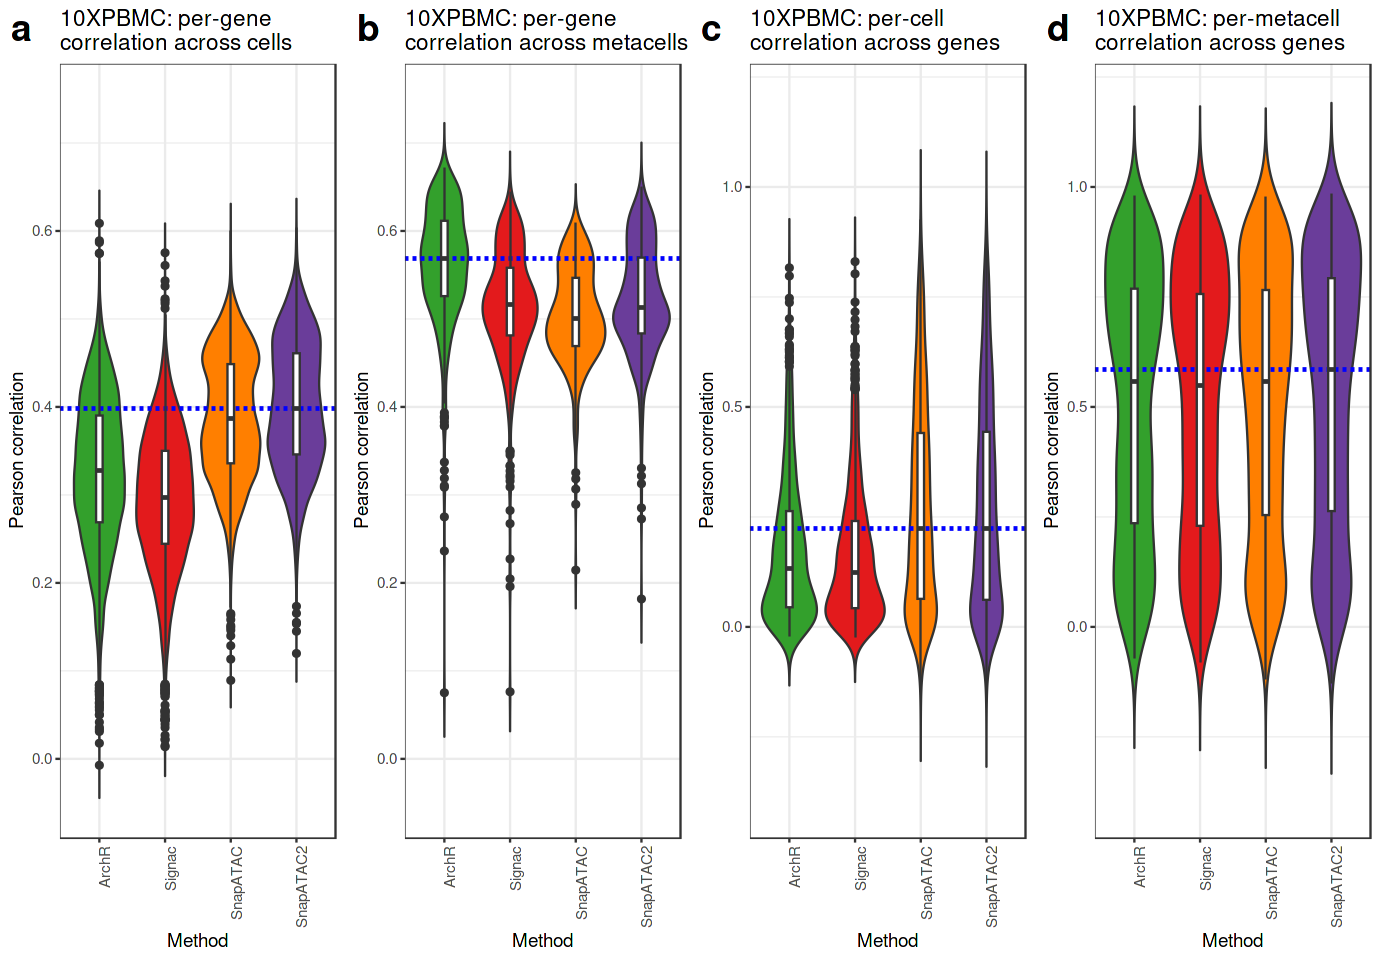

In [ ]:
options(repr.plot.width=11.5, repr.plot.height=8)
p_pbmc <- ggarrange(p1+ylim(-0.05,0.75), p11+ylim(-0.05,0.75), p2+ylim(-0.4,1.2), p12+ylim(-0.4,1.2),
          labels = c("a", "b", "c", "d"),font.label=list(color="black",size=22, face="bold"),
          ncol = 4, nrow = 1)
p_pbmc

pdf("../outputs/PBMC_all_pearson.pdf", width=11, height=5)
plot(p_pbmc)
dev.off() 

### Final representation

Warning message:
“Removed 12 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


png 
  2

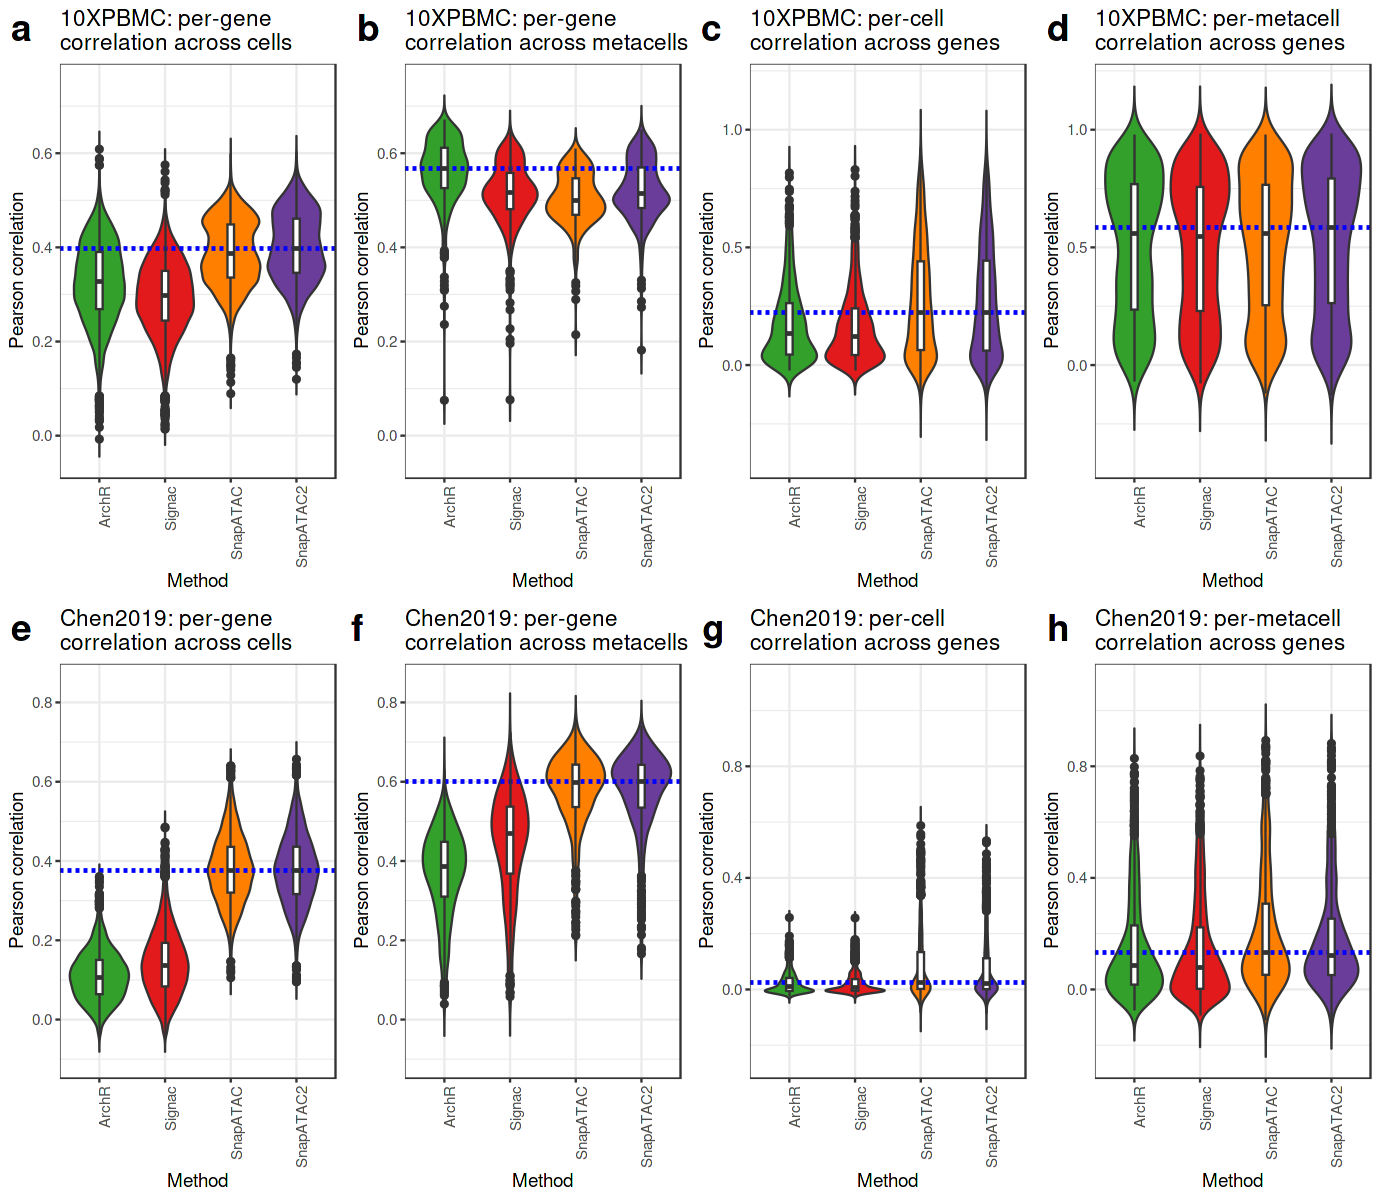

In [ ]:
options(repr.plot.width=11.5, repr.plot.height=10)
p_all <- ggarrange(p1+ylim(-0.05,0.75), p11+ylim(-0.05,0.75), p2+ylim(-0.4,1.2), p12+ylim(-0.4,1.2),p3+ylim(-0.1,0.85), p13+ylim(-0.1, 0.85), p4+ylim(-0.25,1.1), p14+ylim(-0.25,1.1),
          labels = c("a", "b", "c", "d", "e", "f", "g", "h"),font.label=list(color="black",size=22, face="bold"),
          ncol = 4, nrow = 2)
p_all

pdf("../outputs/all_all_pearson.pdf", width=11, height=10)
plot(p_all)
dev.off() 

## Spearman correlation

Warning message:
“Removed 12 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”


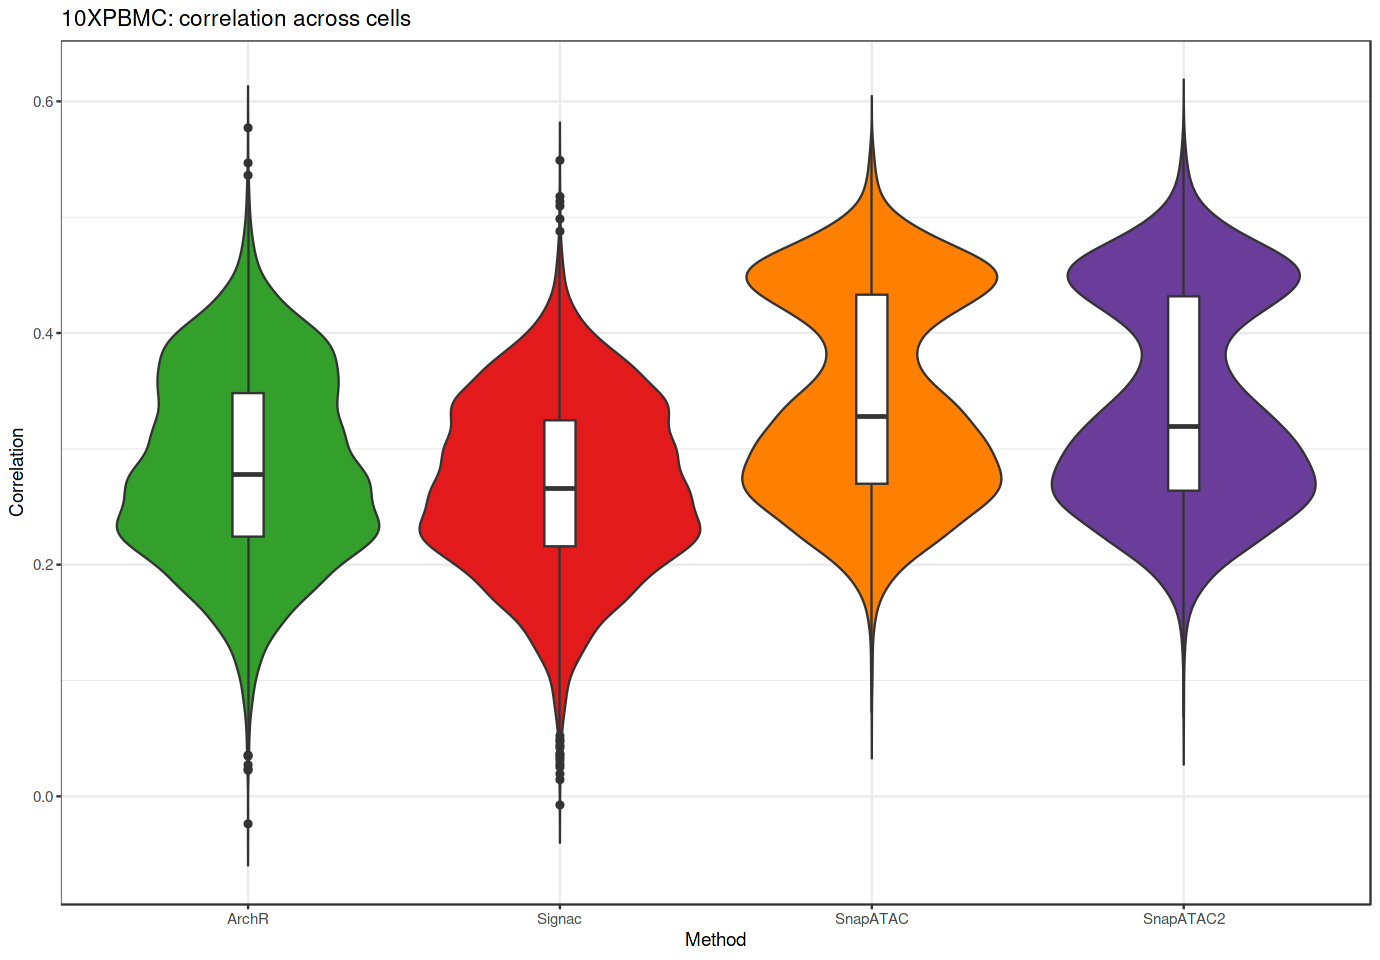

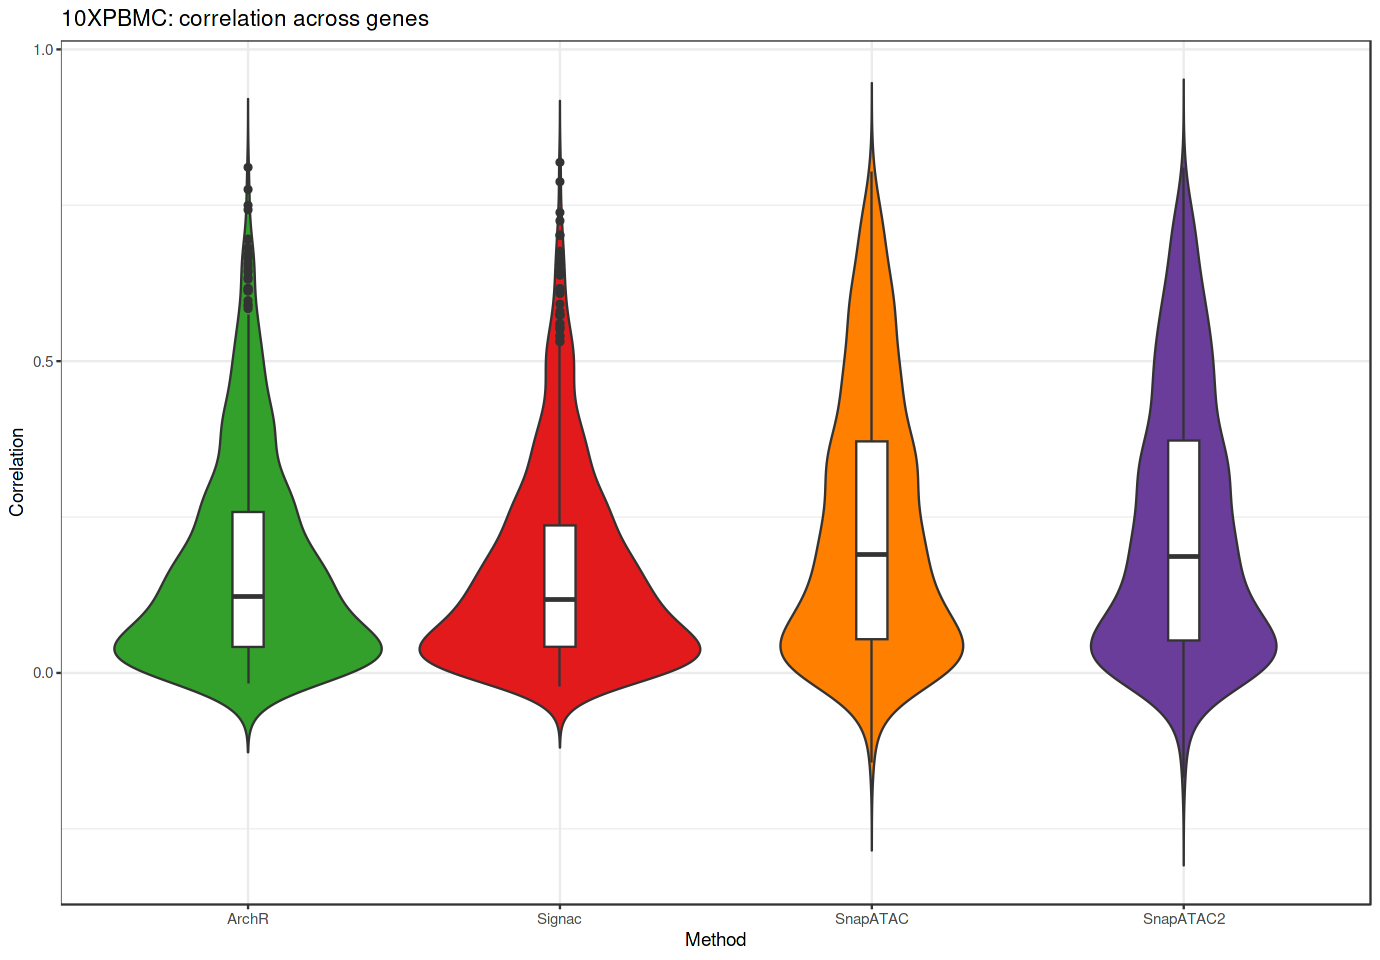

Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


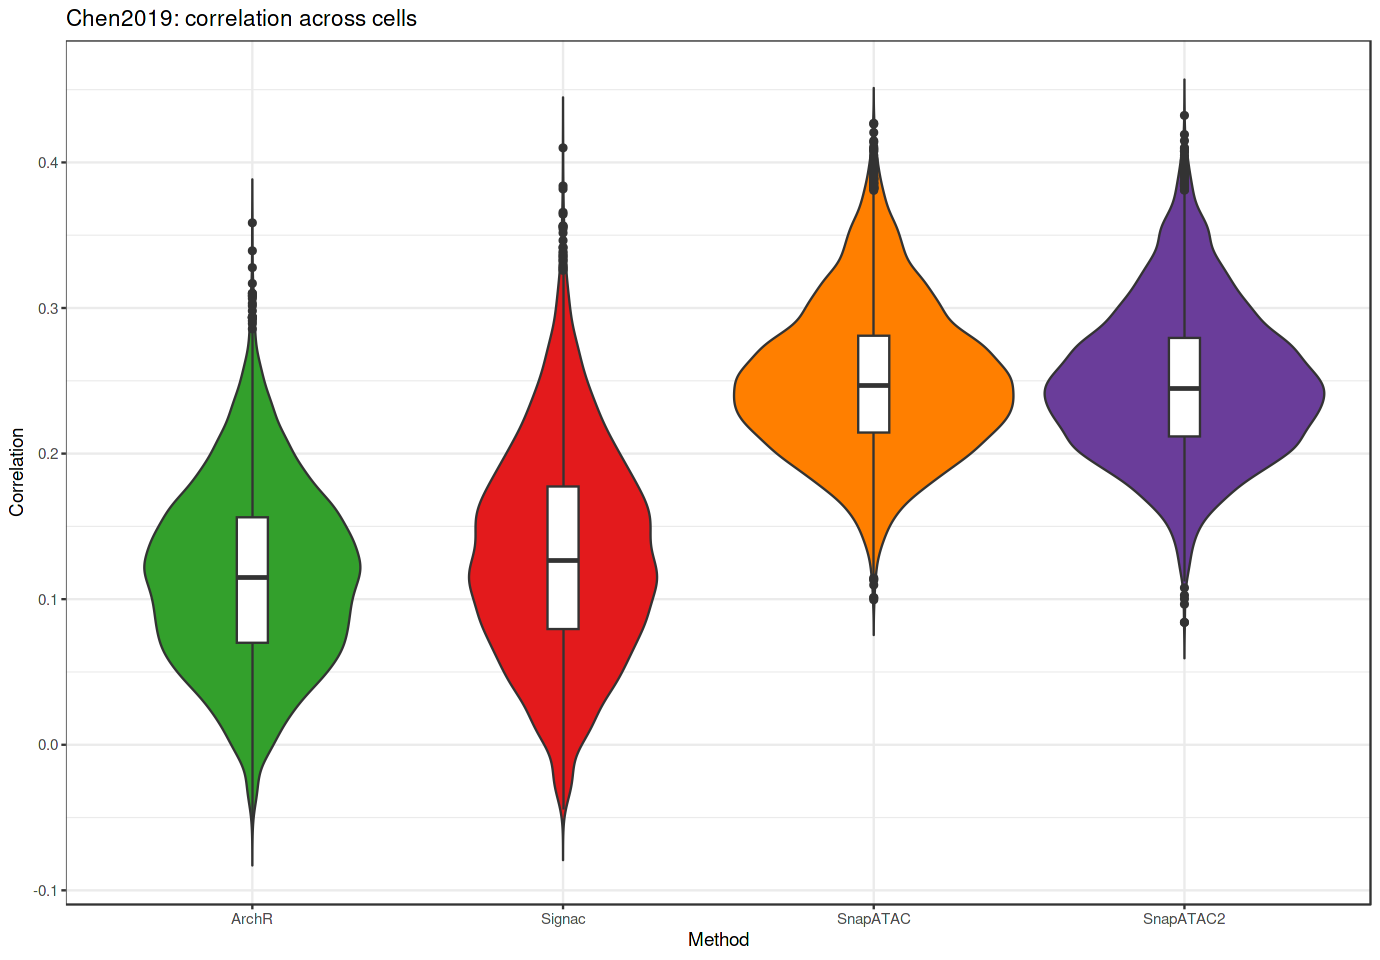

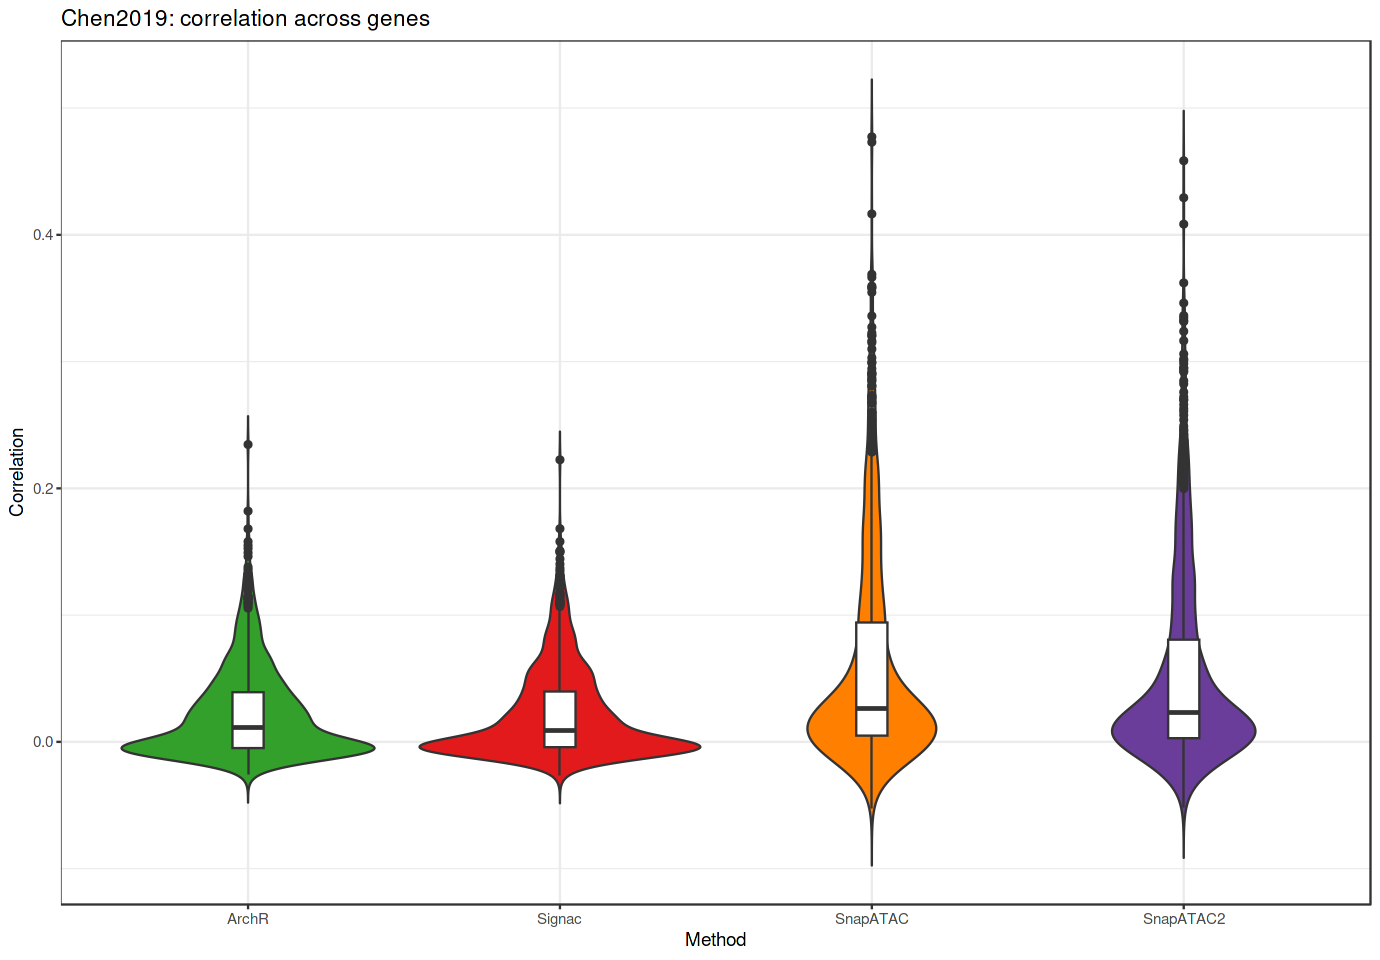

In [53]:
df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/PBMC_multiomics/cells_cor_df_spearman.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p1 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  labs(title="10XPBMC: correlation across cells", x="Method", y="Correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none")

p1

df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/PBMC_multiomics/genes_cor_df_spearman.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p2 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  labs(title="10XPBMC: correlation across genes", x="Method", y="Correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none")

p2

df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/Chen_2019/cells_cor_df_spearman.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p3 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  labs(title="Chen2019: correlation across cells", x="Method", y="Correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none")
p3

df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/Chen_2019/genes_cor_df_spearman.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p4 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  labs(title="Chen2019: correlation across genes", x="Method", y="Correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none")
p4

In [54]:
pdf("../outputs/PBMC_cells_spearman.pdf", width=5, height=5)
plot(p1)
dev.off() 
pdf("../outputs/PBMC_genes_spearman.pdf", width=5, height=5)
plot(p2)
dev.off() 
pdf("../outputs/Chen2019_cells_spearman.pdf", width=5, height=5)
plot(p3)
dev.off() 
pdf("../outputs/Chen2019_genes_spearman.pdf", width=5, height=5)
plot(p4)
dev.off() 

png 
  2

Warning message:
“Removed 12 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”


png 
  2

png 
  2

Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


png 
  2

Warning message:
“Removed 12 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


png 
  2

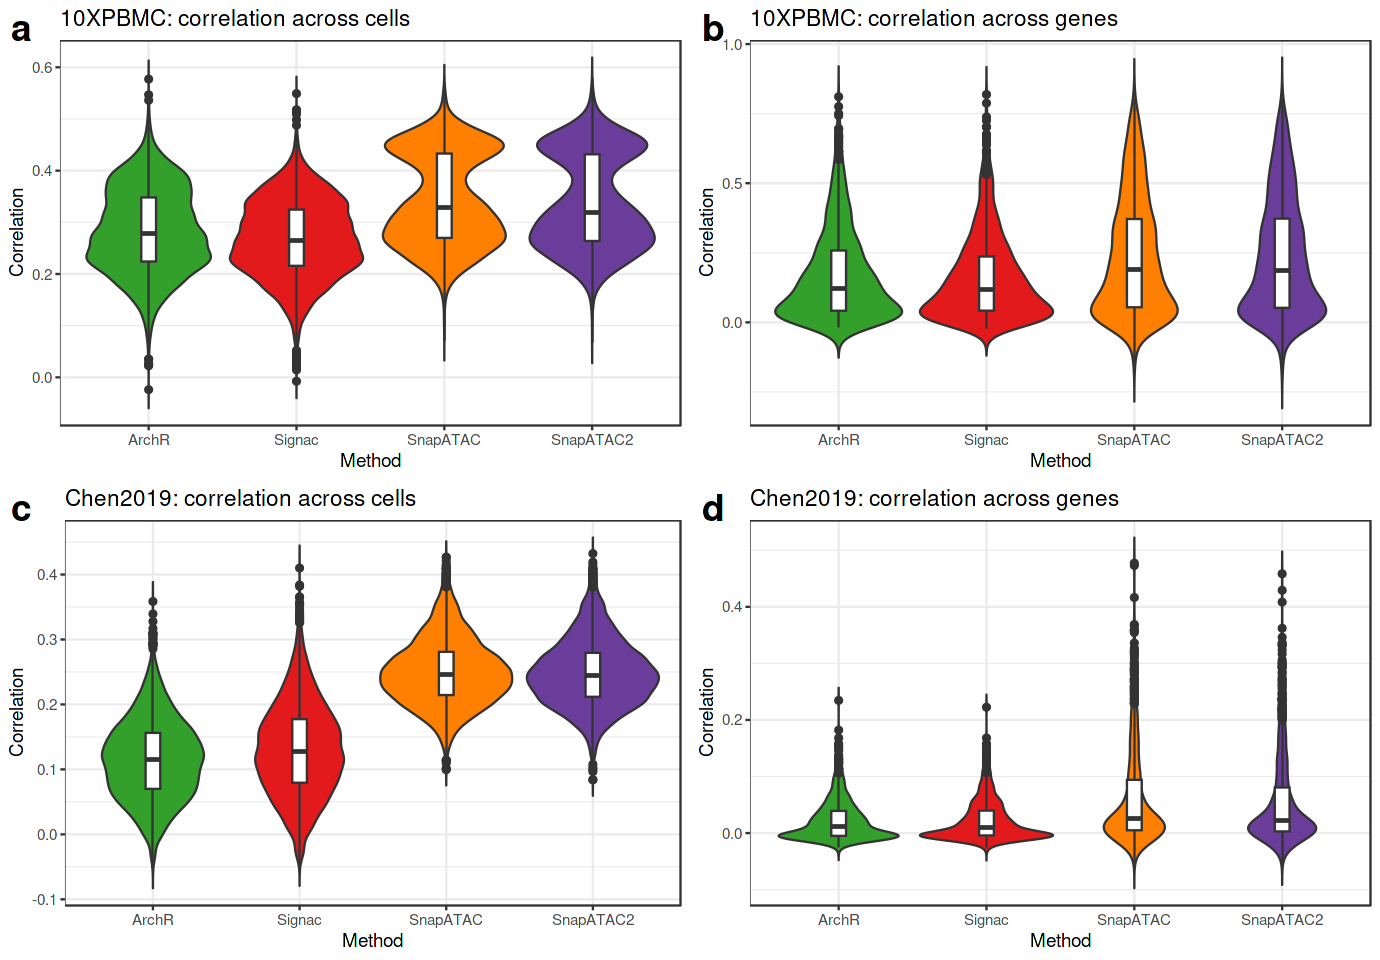

In [55]:
library(ggpubr)
options(repr.plot.width=11.5, repr.plot.height=8)
p6 <- ggarrange(p1, p2, p3, p4,
          labels = c("a", "b", "c", "d"),font.label=list(color="black",size=22, face="bold"),
          ncol = 2, nrow = 2)
p6

pdf("../outputs/all_spearman.pdf", width=10, height=10)
plot(p6)
dev.off() 

## metacells, spearman

Warning message:
“Removed 12 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”


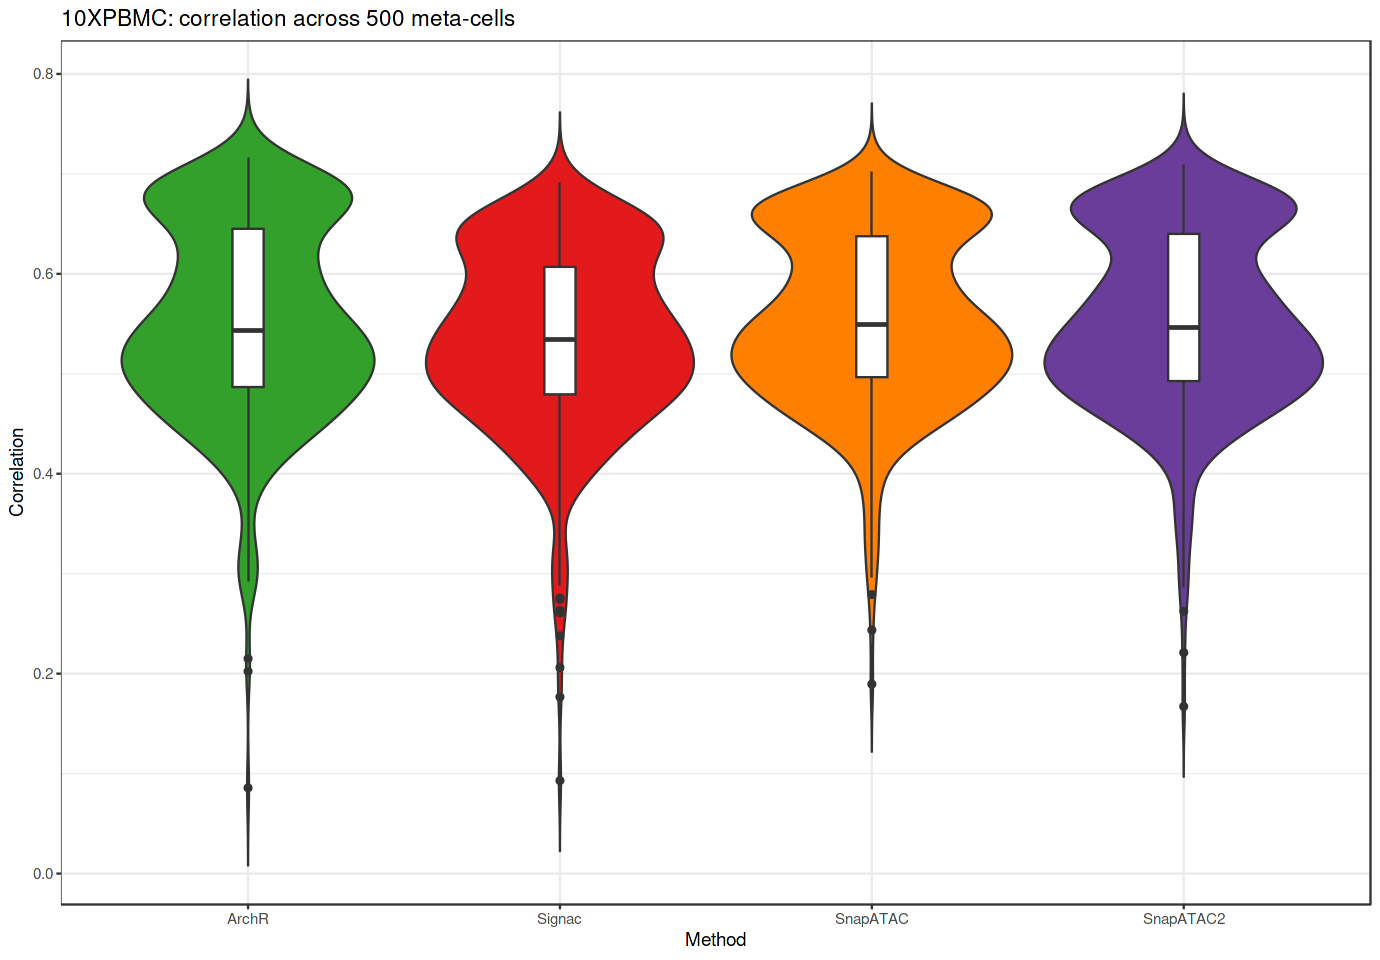

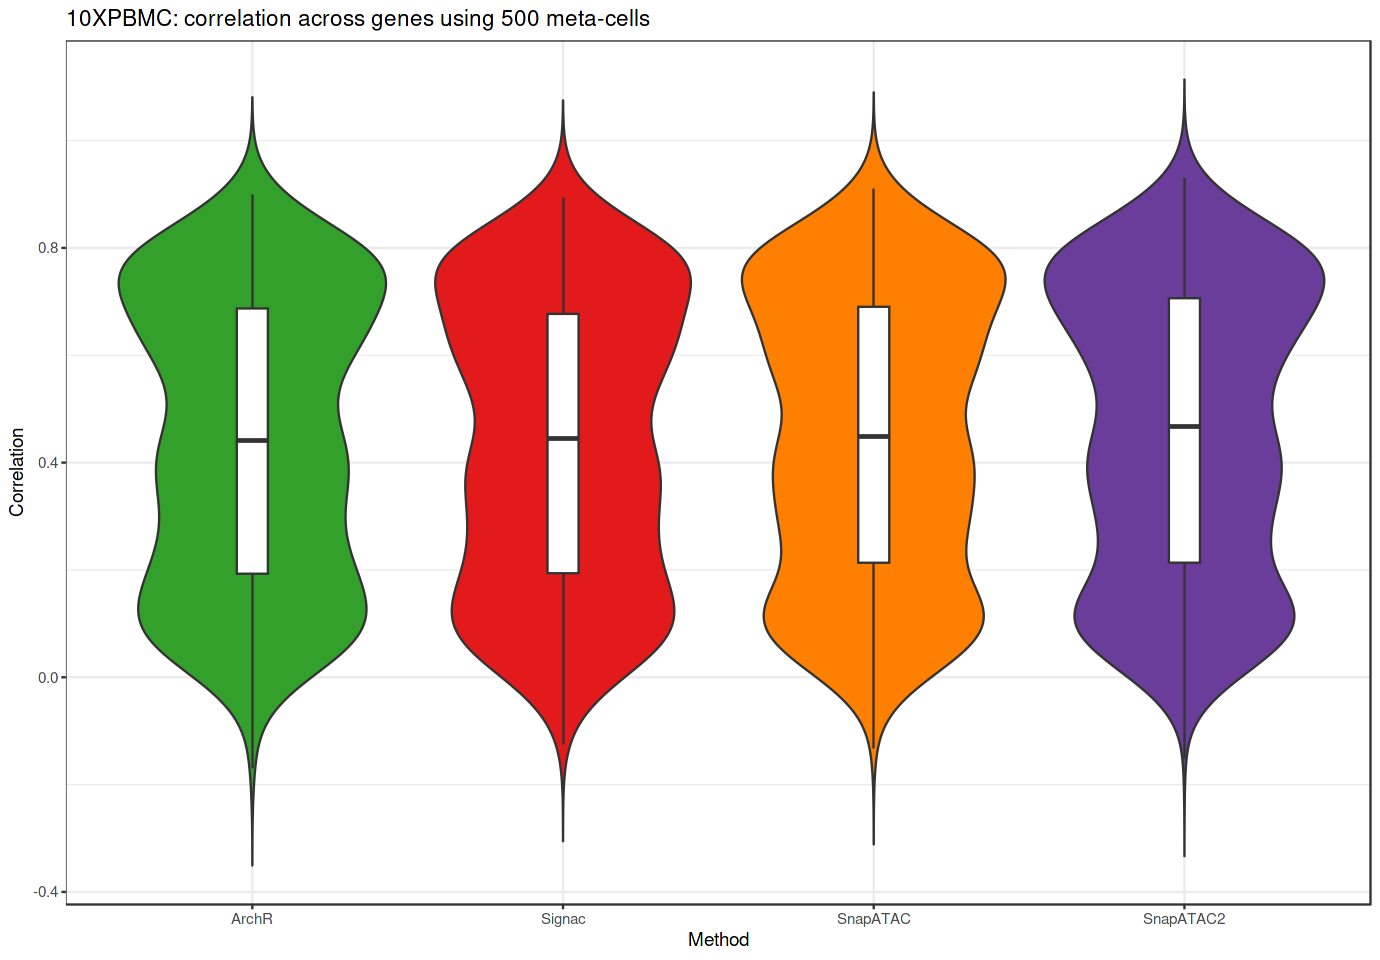

Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


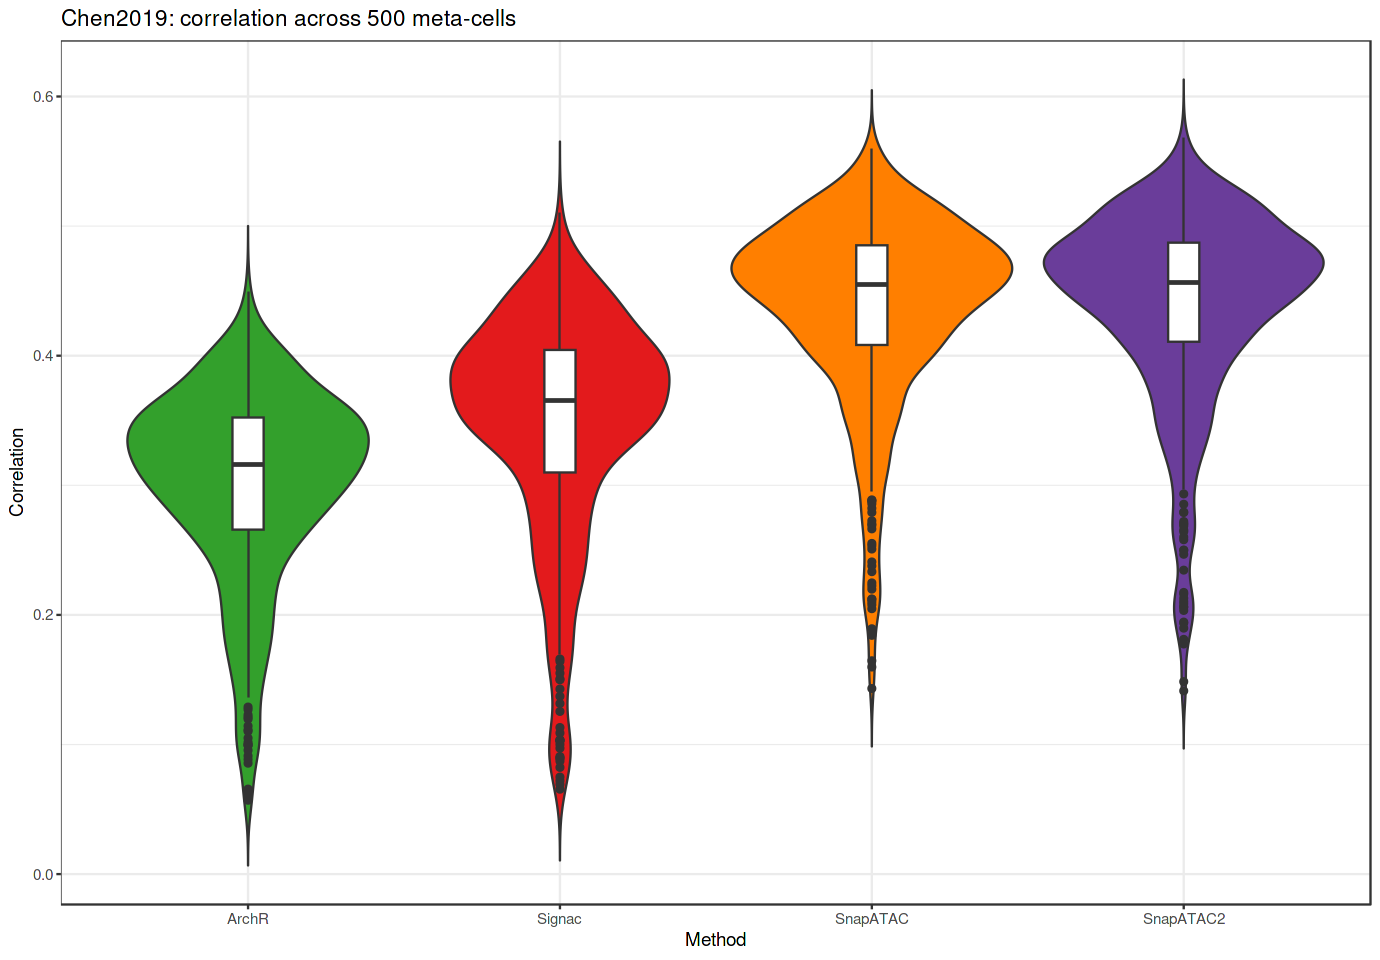

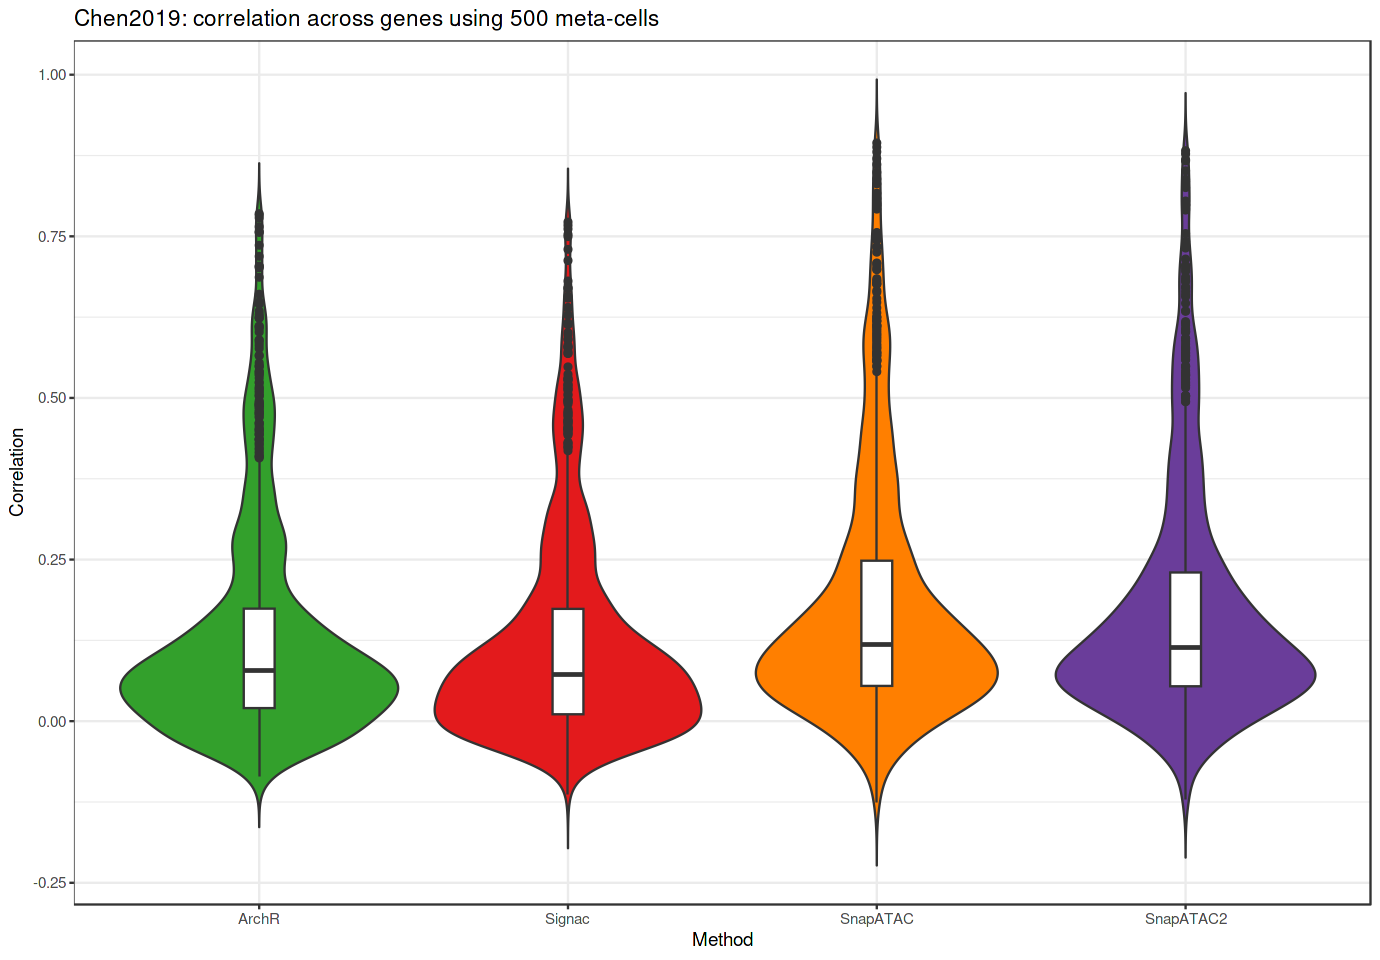

In [58]:
df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/PBMC_multiomics/metacells/cells_cor_df_spearman.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p1 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  labs(title="10XPBMC: correlation across 500 metacells", x="Method", y="Correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none")

p1

df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/PBMC_multiomics/metacells/genes_cor_df_spearman.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p2 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  labs(title="10XPBMC: correlation across genes using 500 metacells", x="Method", y="Correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none")

p2

df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/Chen_2019/metacells/cells_cor_df_spearman.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p3 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  labs(title="Chen2019: correlation across 500 metacells", x="Method", y="Correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none")
p3

df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/Chen_2019/metacells/genes_cor_df_spearman.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p4 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  labs(title="Chen2019: correlation across genes using 500 metacells", x="Method", y="Correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none")
p4

Warning message:
“Removed 12 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


png 
  2

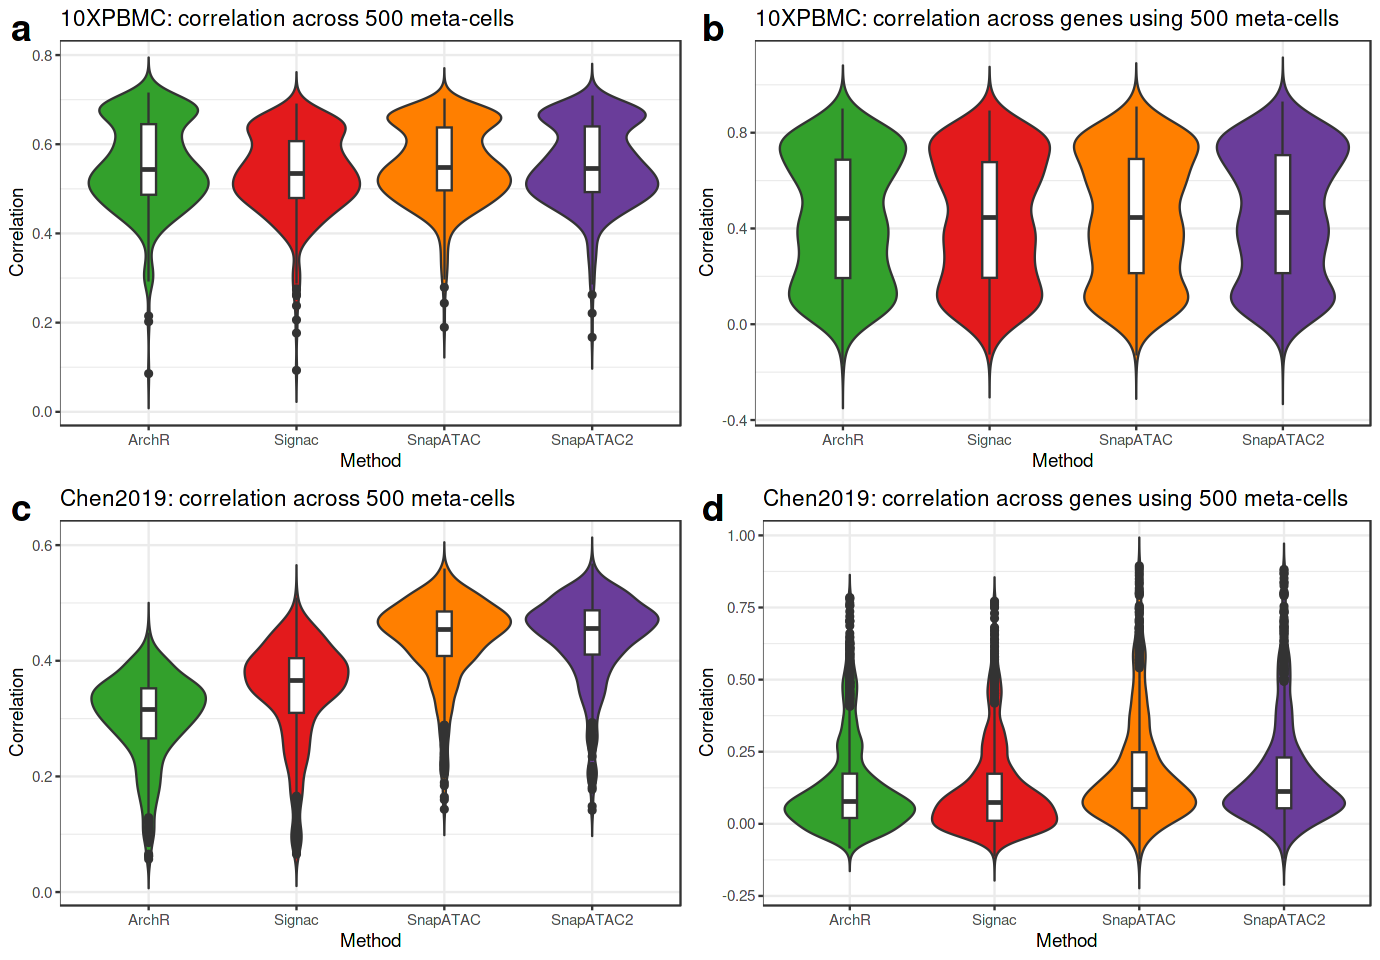

In [59]:
options(repr.plot.width=11.5, repr.plot.height=8)
p8 <- ggarrange(p1, p2, p3, p4,
          labels = c("a", "b", "c", "d"),font.label=list(color="black",size=22, face="bold"),
          ncol = 2, nrow = 2)
p8

pdf("../outputs/metacells_all_spearman.pdf", width=10, height=10)
plot(p8)
dev.off() 

## Kendall's

Warning message:
“Removed 12 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”


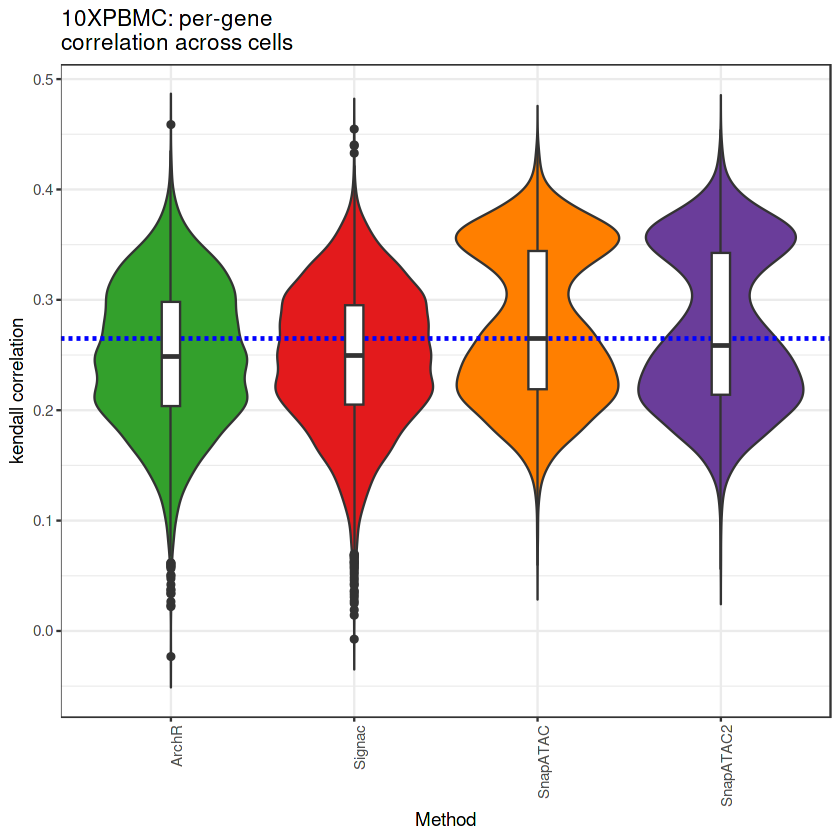

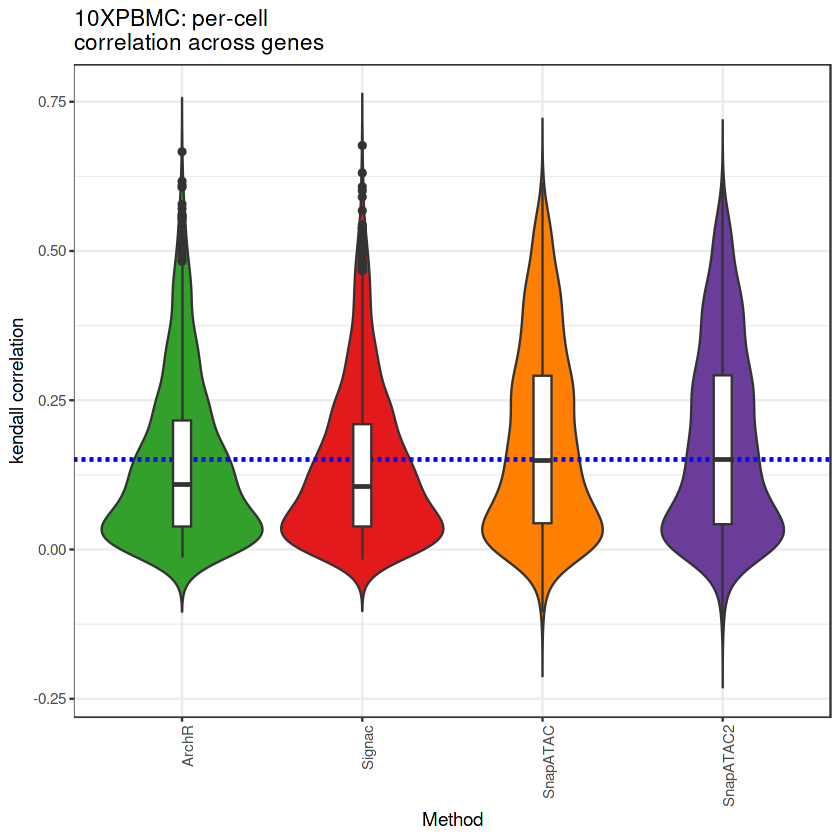

Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


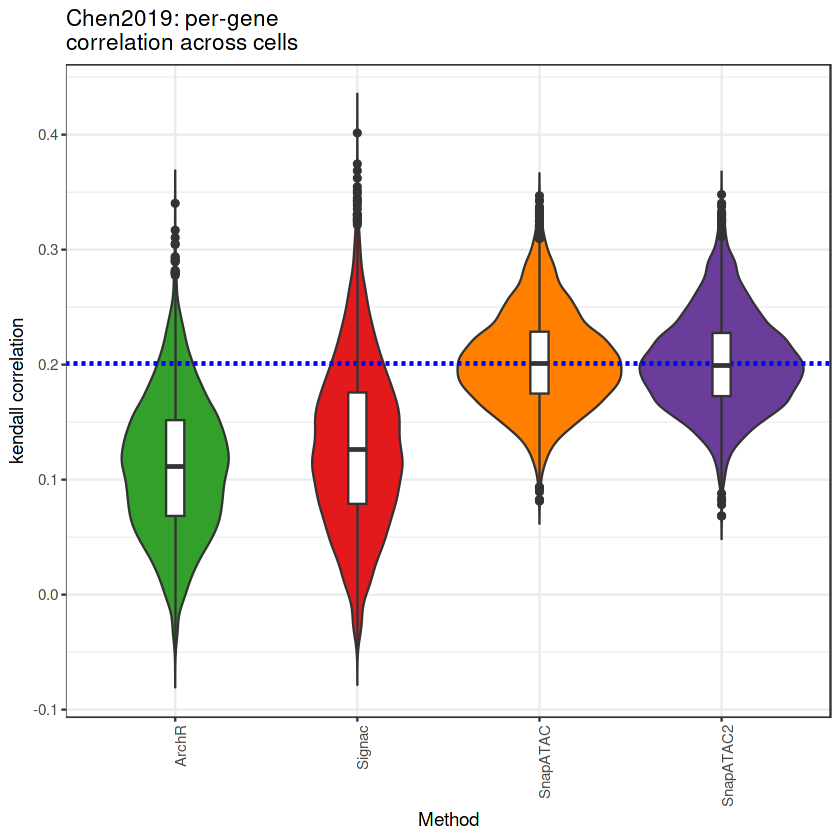

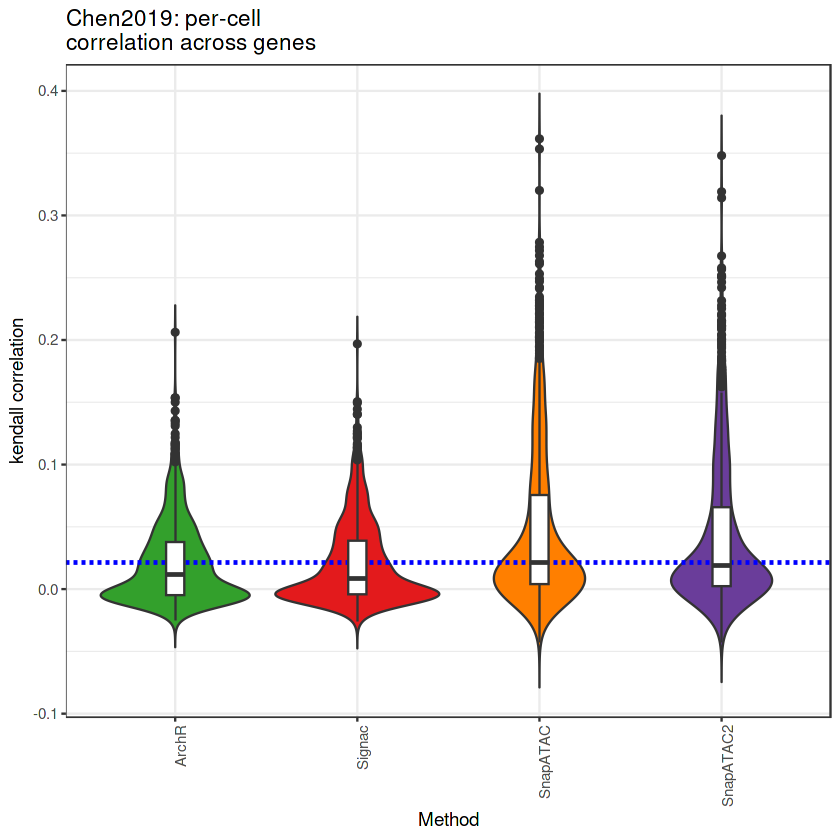

In [7]:
df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/PBMC_multiomics/cells_cor_df_kendall.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p1 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Method", y="kendall correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none") + 
  ggtitle(str_wrap("10XPBMC: per-gene correlation across cells", width = 28))

p1

df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/PBMC_multiomics/genes_cor_df_kendall.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p2 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Method", y="kendall correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none") + 
  ggtitle(str_wrap("10XPBMC: per-cell correlation across genes", width = 25))

p2

df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/Chen_2019/cells_cor_df_kendall.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p3 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Method", y="kendall correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none") + 
  ggtitle(str_wrap("Chen2019: per-gene correlation across cells", width = 28))
p3

df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/Chen_2019/genes_cor_df_kendall.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p4 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Method", y="kendall correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none") + 
  ggtitle(str_wrap("Chen2019: per-cell correlation across genes", width = 25))
p4

Warning message:
“Removed 12 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”


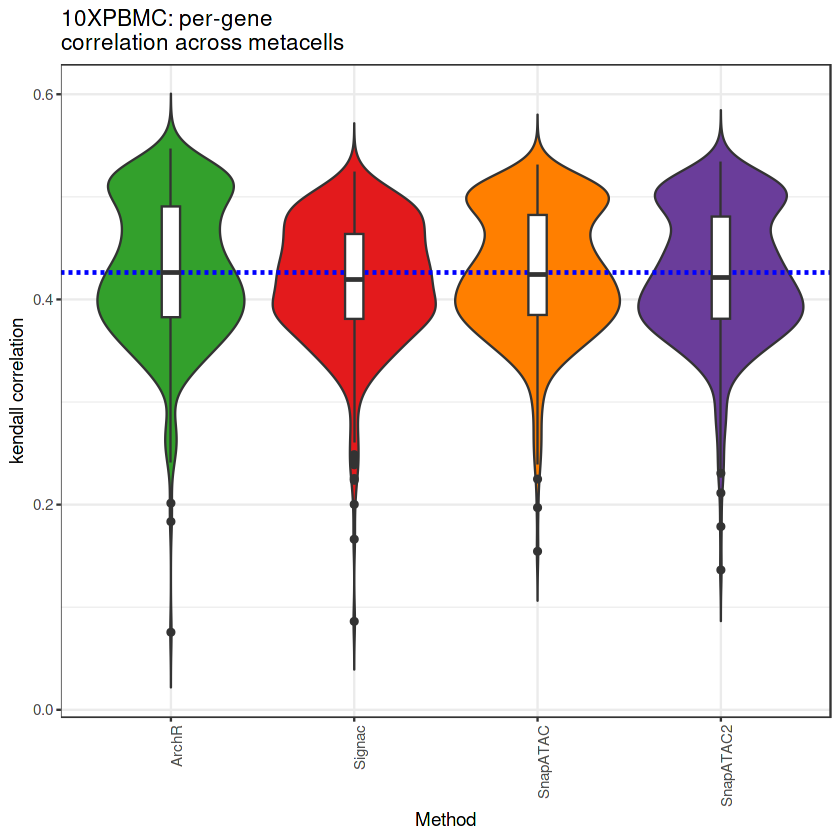

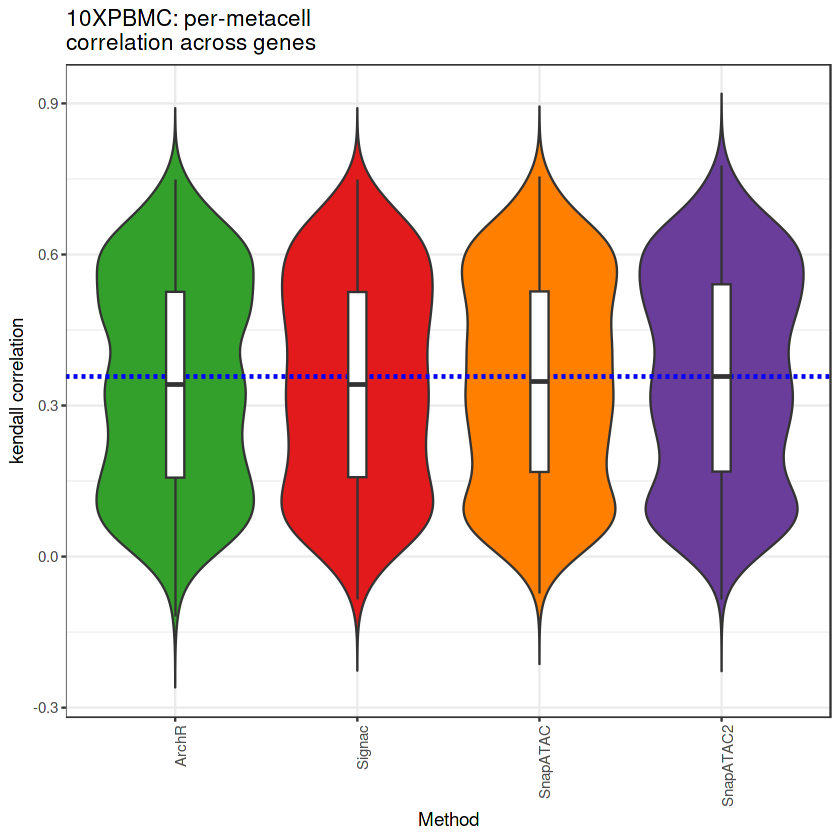

Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


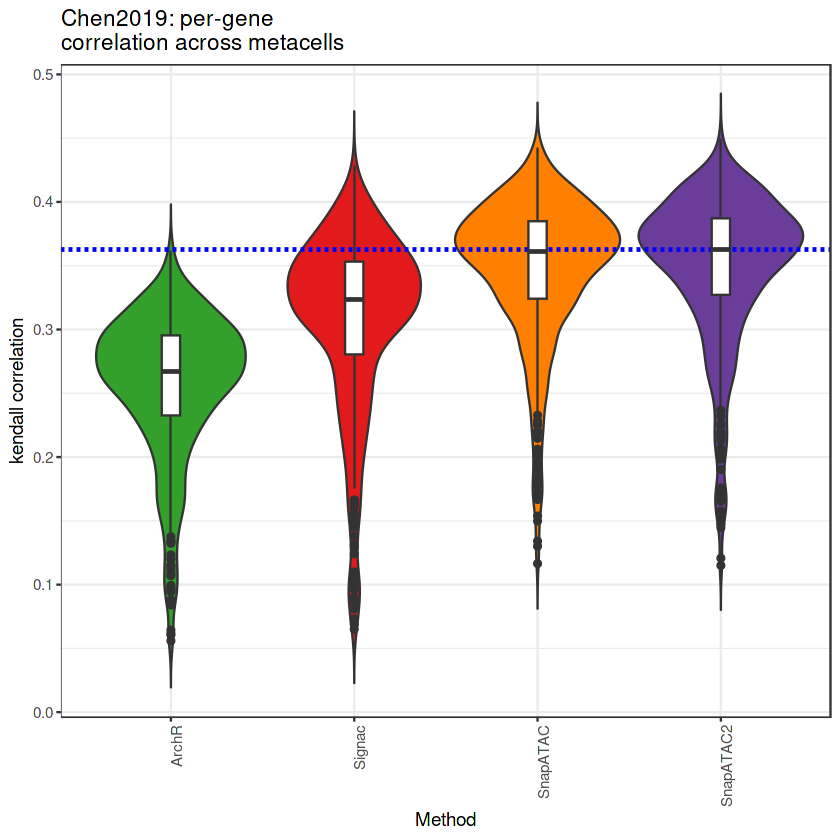

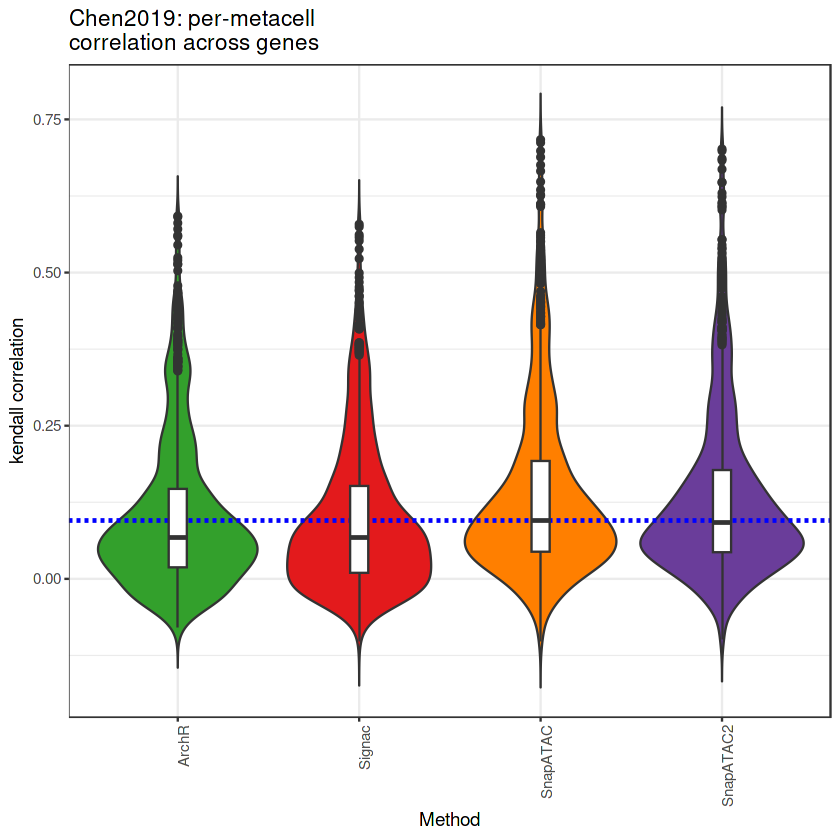

In [8]:
df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/PBMC_multiomics/metacells/cells_cor_df_kendall.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p11 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Method", y="kendall correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none") + 
  ggtitle(str_wrap("10XPBMC: per-gene correlation across metacells", width = 28))

p11

df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/PBMC_multiomics/metacells/genes_cor_df_kendall.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p12 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Method", y="kendall correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none") + 
  ggtitle(str_wrap("10XPBMC: per-metacell correlation across genes", width = 25))

p12

df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/Chen_2019/metacells/cells_cor_df_kendall.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p13 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Method", y="kendall correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none") + 
  ggtitle(str_wrap("Chen2019: per-gene correlation across metacells", width = 28))
p13

df <- readRDS("/home/siluo/public/SiyuanLuo/projects/rebuttal/gene_scores/outputs/Chen_2019/metacells/genes_cor_df_kendall.RDS")
max_median <- df %>% group_by(method) %>% summarize(median=median(value, na.rm=TRUE)) %>% summarize(max=max(median))
max_median <- max_median$max
p14 <- df %>% ggplot(aes(x=method, y=value, fill=method)) + 
  geom_violin(trim=FALSE) + 
  geom_hline(yintercept = max_median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_boxplot(width=0.1, fill="white") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Method", y="kendall correlation") + 
  scale_fill_manual(values = my_col_m[c(4,6,8,10)]) + theme(legend.position = "none") + 
  ggtitle(str_wrap("Chen2019: per-metacell correlation across genes", width = 25))
p14

Warning message:
“Removed 12 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


png 
  2

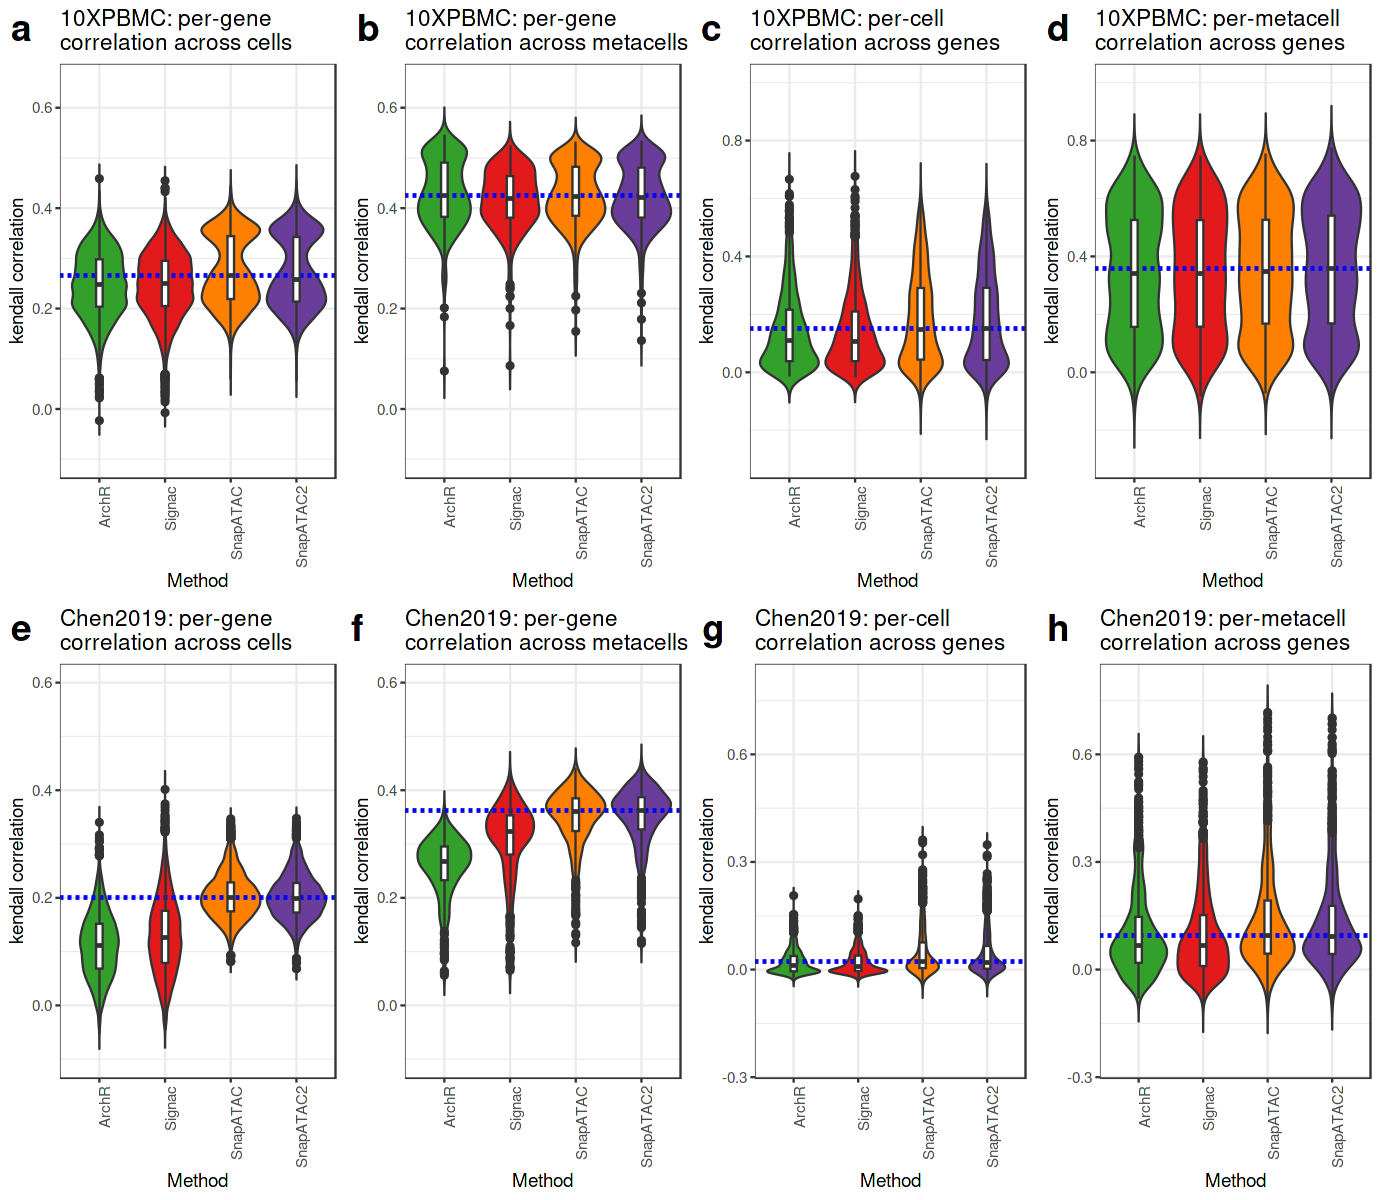

In [9]:
options(repr.plot.width=11.5, repr.plot.height=10)
p_all <- ggarrange(p1+ylim(-0.1,0.65), p11+ylim(-0.1,0.65), p2+ylim(-0.3,1), p12+ylim(-0.3,1),p3+ylim(-0.1,0.6), p13+ylim(-0.1, 0.6), p4+ylim(-0.25,0.8), p14+ylim(-0.25,0.8),
          labels = c("a", "b", "c", "d", "e", "f", "g", "h"),font.label=list(color="black",size=22, face="bold"),
          ncol = 4, nrow = 2)
p_all

pdf("../outputs/all_all_kendall.pdf", width=11, height=10)
plot(p_all)
dev.off() 